In [1]:
 # Don't forget to do : pip install -e.

In [ ]:
import os
from dotenv import load_dotenv
from frame2text4llm.framer import VideoReader, SubtitleRegionDetector, display_frames
from frame2text4llm.ocr import OCRManager, OCRBatchProcessor
from frame2text4llm.ocr.utils import group_and_clean_text

load_dotenv()
 

True

# Load 

In [3]:
video_path = "../sandbox/sample_short.mp4"
reader = VideoReader(video_path, engine="opencv",)
reader.print_info()

2025-04-21 19:26:45.020 | INFO     | frame2text4llm.framer.video:print_info:96 - Video information for sample_short.mp4:
2025-04-21 19:26:45.022 | INFO     | frame2text4llm.framer.video:print_info:97 -   - Dimensions: 720x900
2025-04-21 19:26:45.023 | INFO     | frame2text4llm.framer.video:print_info:98 -   - FPS: 30.00
2025-04-21 19:26:45.025 | INFO     | frame2text4llm.framer.video:print_info:99 -   - Total frames 📸 : 7667


2025-04-21 19:26:45.027 | INFO     | frame2text4llm.framer.video:print_info:100 -   - Duration: 255.57 seconds
2025-04-21 19:26:45.029 | INFO     | frame2text4llm.framer.video:print_info:101 -   - Time per frame: 0.0333 seconds
2025-04-21 19:26:45.031 | INFO     | frame2text4llm.framer.video:print_info:102 -   - Engine: opencv


# Extract

In [4]:
video_path = "../sandbox/sample_short.mp4"
reader = VideoReader(video_path, engine="opencv",)
reader.print_info()

frames = reader.extract_frames(target_fps=1, max_frames=-1)

2025-04-21 19:26:45.075 | INFO     | frame2text4llm.framer.video:print_info:96 - Video information for sample_short.mp4:
2025-04-21 19:26:45.076 | INFO     | frame2text4llm.framer.video:print_info:97 -   - Dimensions: 720x900
2025-04-21 19:26:45.078 | INFO     | frame2text4llm.framer.video:print_info:98 -   - FPS: 30.00
2025-04-21 19:26:45.080 | INFO     | frame2text4llm.framer.video:print_info:99 -   - Total frames 📸 : 7667
2025-04-21 19:26:45.080 | INFO     | frame2text4llm.framer.video:print_info:100 -   - Duration: 255.57 seconds
2025-04-21 19:26:45.081 | INFO     | frame2text4llm.framer.video:print_info:101 -   - Time per frame: 0.0333 seconds
2025-04-21 19:26:45.083 | INFO     | frame2text4llm.framer.video:print_info:102 -   - Engine: opencv
2025-04-21 19:26:45.084 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:202 - Extracting frames with OpenCV: sample_short.mp4


2025-04-21 19:26:45.148 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:217 - 💡 Extracting 255 frames from 7667 total frames at 1 FPS
2025-04-21 19:26:46.025 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 10 frames...
2025-04-21 19:26:46.711 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 20 frames...
2025-04-21 19:26:47.415 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 30 frames...
2025-04-21 19:26:48.130 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 40 frames...
2025-04-21 19:26:48.853 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 50 frames...
2025-04-21 19:26:49.586 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 60 frames...
2025-04-21 19:26:50.280 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 70 frames...
2025-04-21 19:26:50.987 | INFO 

# Visualiasize

2025-04-21 19:27:03.578 | INFO     | frame2text4llm.framer.plot:display_frames:39 - 5


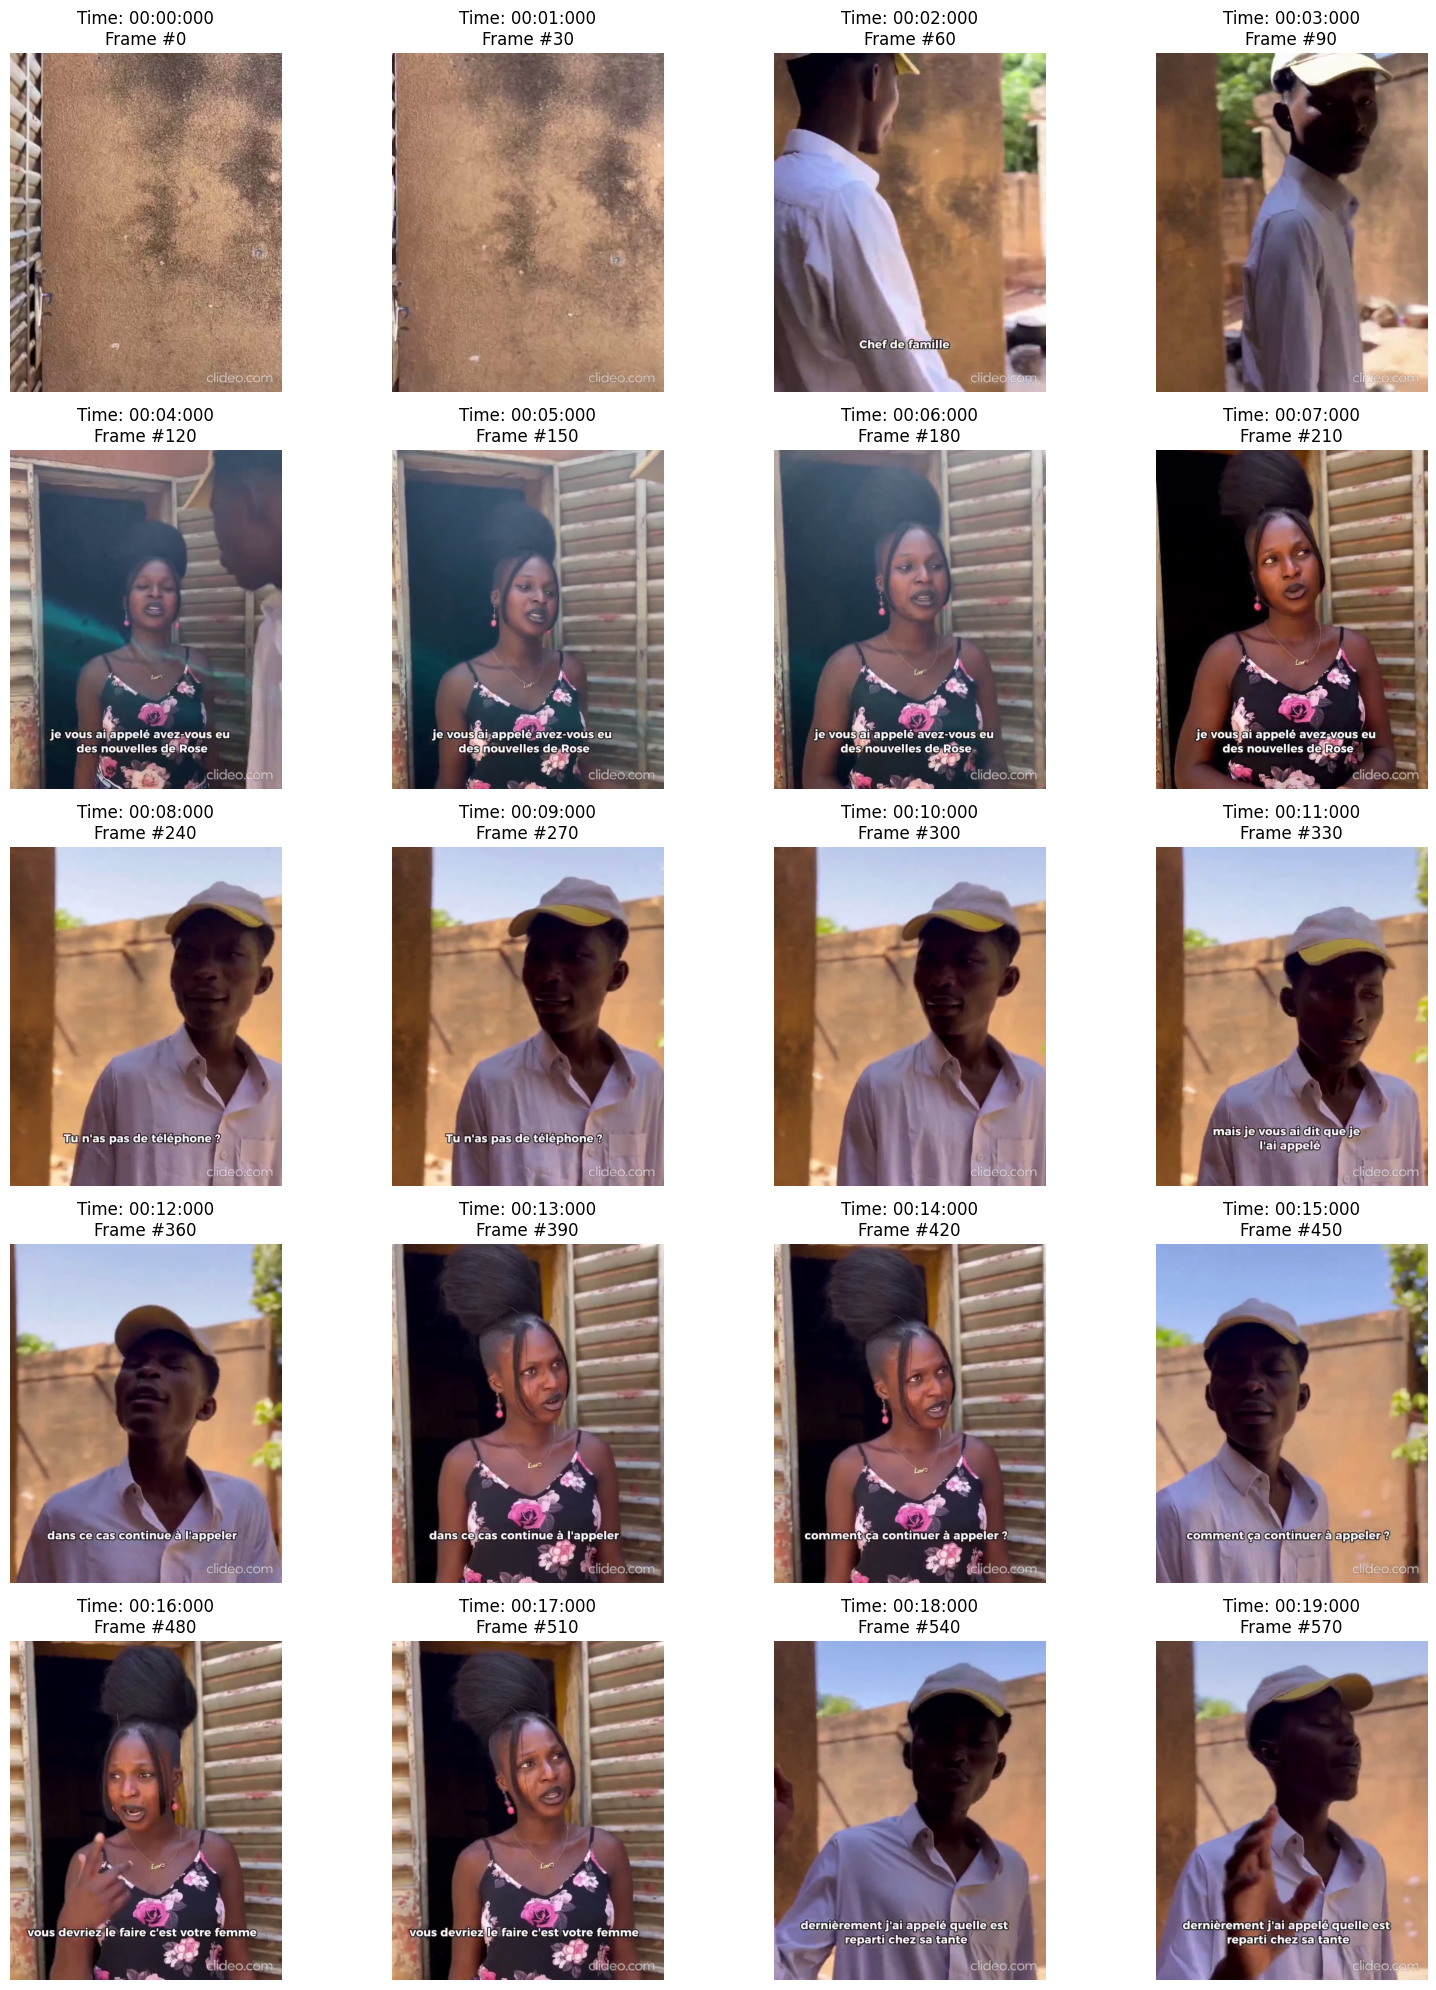

In [5]:
display_frames(frames, max_samples=20)

#  Subtitle detection

2025-04-21 19:27:06.458 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:06.459 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:07.067 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


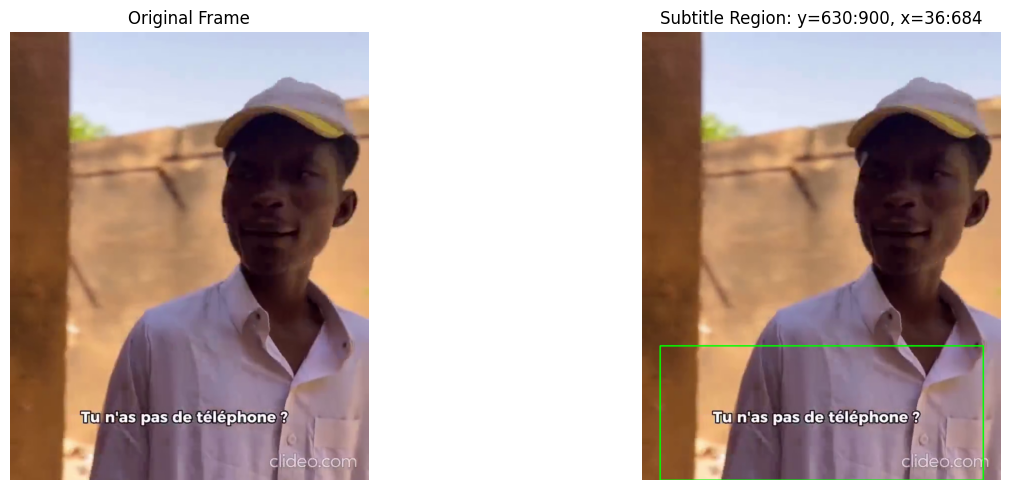

In [6]:
detector = SubtitleRegionDetector(reader)
subtitle_region = detector.detect_region()
images = [frame.image for frame in frames] 
detector.visualize_region(subtitle_region, images ,frame_index=8)

# OCR

In [7]:
from frame2text4llm.ocr import OCRManager


MISTRAL_API_KEY = os.getenv("MISTRAL_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
ocr_manager = OCRManager(reader)

In [8]:
frames = reader.extract_frames(target_fps=1, max_frames=-1)

2025-04-21 19:27:07.420 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:202 - Extracting frames with OpenCV: sample_short.mp4
2025-04-21 19:27:07.443 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:217 - 💡 Extracting 255 frames from 7667 total frames at 1 FPS
2025-04-21 19:27:08.109 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 10 frames...
2025-04-21 19:27:08.852 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 20 frames...
2025-04-21 19:27:09.599 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 30 frames...
2025-04-21 19:27:10.375 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 40 frames...
2025-04-21 19:27:11.102 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 50 frames...
2025-04-21 19:27:11.861 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 60 frames...
2025-0

## 1. Pytessarct

In [9]:
images = [frame.image for frame in frames] 

extracted_text = ocr_manager.process( image=images[8], tool="tesseract", lang="fr")

2025-04-21 19:27:27.221 | INFO     | frame2text4llm.ocr.tools.tesseract:_configure_tesseract:21 - 🔍 Trying to find tesseract in system PATH
2025-04-21 19:27:27.231 | INFO     | frame2text4llm.ocr.tools.tesseract:_configure_tesseract:40 - ✅ Tesseract found at fallback Windows path: C:\Program Files\Tesseract-OCR\tesseract.exe
2025-04-21 19:27:27.276 | INFO     | frame2text4llm.ocr.tools.tesseract:get_available_languages:52 - 📚 Available Tesseract languages: ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'deu_latf', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'lao', 'lat',

In [10]:
extracted_text = ocr_manager.process( image=images[8], tool="tesseract", lang="fr")
print(extracted_text)

2025-04-21 19:27:28.040 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:28.041 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:28.485 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:27:28.487 | WARNING  | frame2text4llm.ocr.tools.tesseract:process_image:72 - ⚠️ Language 'fr' not available. Falling back to 'eng'.
2025-04-21 19:27:28.488 | INFO     | frame2text4llm.ocr.tools.tesseract:process_image:73 - 📚 Available Tesseract languages: ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'deu_latf', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frm', 'fry', 'g

iu nias pas de telephone 7 ;
&


# PaddleOCR

In [11]:
extracted_text = ocr_manager.process( image=images[8], tool="paddleocr", lang="fr")
print(extracted_text)

c:\Users\sawal\.virtualenvs\venv_frame2text\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
2025-04-21 19:27:34.157 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:34.158 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:34.604 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:27:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

In [12]:
extracted_text = ocr_manager.process( image=images[8], tool="tesseract", lang="fra")
print(extracted_text)

2025-04-21 19:27:38.101 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:38.103 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:38.550 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:27:38.822 | DEBUG    | frame2text4llm.ocr.tools.tesseract:process_image:79 - 📝 OCR Result (lang=fra): Muin'as pas detéléphone!? |
\ ©...


Muin'as pas detéléphone!? |
\ ©


# LLM as services

# OPENAI GTPT4o mini

In [13]:
result = ocr_manager.process(image=images[8], tool="openai",api_key=OPENAI_API_KEY)
print(result)

2025-04-21 19:27:38.835 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:38.837 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:39.282 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


Tu n'as pas de téléphone ?


# Mistral

In [14]:
text_mistral = ocr_manager.process(image=images[8],
   tool="mistral",
   api_key=MISTRAL_API_KEY
)
print(text_mistral)

2025-04-21 19:27:42.763 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:42.766 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:43.220 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


# Tu n'as pas de téléphone?


# Aggregator  PaddleOCR

In [15]:
processor = OCRBatchProcessor(ocr_manager)
results = processor.process_batch(
    frames=frames,
    tool="paddleocr",
    lang="fr", 
    n_cores=4,
    preserve_order=True
)

for result in results:
    if result["success"]:
        print(f"Frame at {result['time_formatted']}: {result['text']}")
    else:
        print(f"Failed to process frame at {result['time_formatted']}: {result['error']}")


2025-04-21 19:27:46.035 | INFO     | frame2text4llm.ocr.batch:process_batch:123 - Starting batch OCR processing of 256 frames using 4 threads
2025-04-21 19:27:46.039 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:46.044 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:46.048 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:46.054 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:46.074 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:27:46.083 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:46.106 | INFO     | frame2te

[2025/04/21 19:27:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:27:49.411 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:27:50.085 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:27:50.085 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:27:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:27:57.894 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:00:000


[2025/04/21 19:27:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 3.4642651081085205


2025-04-21 19:27:57.986 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   0%|          | 1/256 [00:11<49:18, 11.60s/it]2025-04-21 19:27:57.991 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:27:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.5261430740356445
[2025/04/21 19:27:58] ppocr DEBUG: cls num  : 1, elapsed : 0.0377657413482666
[2025/04/21 19:27:58] ppocr DEBUG: cls num  : 1, elapsed : 0.08910632133483887
[2025/04/21 19:27:58] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.6505770683288574
[2025/04/21 19:27:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.43399500846862793


2025-04-21 19:27:58.616 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:01:000


[2025/04/21 19:27:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.5897476673126221


2025-04-21 19:27:58.708 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   1%|          | 2/256 [00:12<22:01,  5.20s/it]2025-04-21 19:27:58.711 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:27:58] ppocr DEBUG: cls num  : 2, elapsed : 0.26267242431640625


2025-04-21 19:27:58.894 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:03:000
2025-04-21 19:27:59.382 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   1%|          | 3/256 [00:12<13:12,  3.13s/it]

[2025/04/21 19:27:59] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4071037769317627


2025-04-21 19:27:59.572 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:27:59.571 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:02:000
2025-04-21 19:27:59.576 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   2%|▏         | 4/256 [00:13<08:17,  1.97s/it]2025-04-21 19:27:59.578 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:00.116 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:02.904 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:05.427 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:05] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.40020132064819336


2025-04-21 19:28:05.437 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:06.002 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:04:000
2025-04-21 19:28:06.769 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:06.770 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:   2%|▏         | 5/256 [00:20<16:07,  3.86s/it]

[2025/04/21 19:28:10] ppocr DEBUG: cls num  : 3, elapsed : 4.334564685821533
[2025/04/21 19:28:10] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5465772151947021


2025-04-21 19:28:10.880 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:05:000
2025-04-21 19:28:10.882 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   2%|▏         | 6/256 [00:24<16:25,  3.94s/it]2025-04-21 19:28:10.886 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:10] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.7249965667724609
[2025/04/21 19:28:10] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.6890568733215332
[2025/04/21 19:28:10] ppocr DEBUG: cls num  : 3, elapsed : 0.03594636917114258
[2025/04/21 19:28:11] ppocr DEBUG: cls num  : 3, elapsed : 0.03291487693786621
[2025/04/21 19:28:11] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5950632095336914


2025-04-21 19:28:11.680 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:28:11.680 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:07:000


[2025/04/21 19:28:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:11.695 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   3%|▎         | 7/256 [00:25<12:07,  2.92s/it]2025-04-21 19:28:12.129 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:12] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5939974784851074


2025-04-21 19:28:13.000 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:06:000
2025-04-21 19:28:13.499 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   3%|▎         | 8/256 [00:27<10:35,  2.56s/it]2025-04-21 19:28:14.295 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:14] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.18271589279174805
[2025/04/21 19:28:14] ppocr DEBUG: cls num  : 2, elapsed : 0.24773240089416504


2025-04-21 19:28:14.944 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:14] ppocr DEBUG: rec_res num  : 2, elapsed : 0.21096515655517578
[2025/04/21 19:28:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec

2025-04-21 19:28:15.098 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:08:000
2025-04-21 19:28:15.964 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   4%|▎         | 9/256 [00:30<11:16,  2.74s/it]2025-04-21 19:28:16.627 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:17.291 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:19.626 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:22.170 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:22] ppocr DEBUG: rec_res num  : 2, elapsed : 0.19286298751831055
[2025/04/21 19:28:22] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4509716033935547


2025-04-21 19:28:22.484 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:10:000
2025-04-21 19:28:22.573 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   4%|▍         | 10/256 [00:36<15:17,  3.73s/it]

[2025/04/21 19:28:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:22.573 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:09:000


[2025/04/21 19:28:22] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.7481696605682373


2025-04-21 19:28:22.575 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:22.577 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:23.293 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:24] ppocr DEBUG: cls num  : 3, elapsed : 0.7624068260192871
[2025/04/21 19:28:25] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4306766986846924


2025-04-21 19:28:25.358 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:11:000
2025-04-21 19:28:25.361 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   5%|▍         | 12/256 [00:38<10:43,  2.64s/it]2025-04-21 19:28:25.365 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:25] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.575047492980957
[2025/04/21 19:28:25] ppocr DEBUG: cls num  : 2, elapsed : 0.03664588928222656
[2025/04/21 19:28:26] ppocr DEBUG: rec_res num  : 2, elapsed : 0.6013853549957275


2025-04-21 19:28:26.016 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:28:26.211 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:12:000


[2025/04/21 19:28:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:26.962 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   5%|▌         | 13/256 [00:40<09:37,  2.38s/it]2025-04-21 19:28:26.962 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:28:26.965 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:30.129 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:33.050 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:33] ppocr DEBUG: cls num  : 2, elapsed : 0.06841564178466797
[2025/04/21 19:28:33] ppocr DEBUG: cls num  : 2, elapsed : 0.03539681434631348
[2025/04/21 19:28:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_

2025-04-21 19:28:35.412 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:14:000


[2025/04/21 19:28:35] ppocr DEBUG: rec_res num  : 2, elapsed : 2.113574981689453


2025-04-21 19:28:36.408 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   5%|▌         | 14/256 [00:50<17:06,  4.24s/it]2025-04-21 19:28:36.610 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:36] ppocr DEBUG: cls num  : 2, elapsed : 0.2587902545928955


2025-04-21 19:28:36.668 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:13:000
2025-04-21 19:28:36.905 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   6%|▌         | 15/256 [00:50<12:55,  3.22s/it]2025-04-21 19:28:36.906 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:37] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.8501121997833252
[2025/04/21 19:28:37] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5833864212036133


2025-04-21 19:28:37.638 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:15:000


[2025/04/21 19:28:37] ppocr DEBUG: cls num  : 2, elapsed : 0.2229616641998291


2025-04-21 19:28:37.641 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   6%|▋         | 16/256 [00:51<10:04,  2.52s/it]2025-04-21 19:28:37.642 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:38] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4984903335571289


2025-04-21 19:28:38.554 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:16:000
2025-04-21 19:28:38.556 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:38.557 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:   7%|▋         | 17/256 [00:52<08:12,  2.06s/it]2025-04-21 19:28:38.563 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:40.765 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:42.446 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:42] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.6922869682312012
[2025/04/21 19:28:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:28:45.210 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:48.094 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:17:000
2025-04-21 19:28:48.098 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   7%|▋         | 18/256 [01:01<16:47,  4.23s/it]

[2025/04/21 19:28:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 5.125325918197632


2025-04-21 19:28:48.107 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:28:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.9728028774261475
[2025/04/21 19:28:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.10113334655761719
[2025/04/21 19:28:48] ppocr DEBUG: cls num  : 3, elapsed : 0.039339303970336914
[2025/04/21 19:28:48] ppocr DEBUG: cls num  : 3, elapsed : 0.17825007438659668
[2025/04/21 19:28:48] ppocr DEBUG: cls num  : 3, elapsed : 0.08759903907775879
[2025/04/21 19:28:49] ppocr DEBUG: rec_res num  : 3, elapsed : 0.83998703956604
[2025/04/21 19:28:49] ppocr DEBUG: rec_res num  : 3, elapsed : 0.8433892726898193


2025-04-21 19:28:49.340 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:19:000
2025-04-21 19:28:49.470 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   7%|▋         | 19/256 [01:03<13:24,  3.39s/it]2025-04-21 19:28:49.470 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:18:000


[2025/04/21 19:28:49] ppocr DEBUG: rec_res num  : 3, elapsed : 1.4875195026397705


🔠 OCR Processing:   8%|▊         | 20/256 [01:03<09:58,  2.54s/it]2025-04-21 19:28:49.473 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:49.956 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:50.160 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:20:000
2025-04-21 19:28:50.162 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:   8%|▊         | 21/256 [01:03<07:13,  1.85s/it]2025-04-21 19:28:50.164 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:50.173 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:50.571 | INFO     | frame2text4llm.f

[2025/04/21 19:28:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:53.625 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:21:000
2025-04-21 19:28:53.625 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
🔠 OCR Processing:   9%|▊         | 22/256 [01:07<09:04,  2.33s/it]

[2025/04/21 19:28:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:28:53.627 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:28:53.646 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:28:55.768 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:28:55.769 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:28:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:00.929 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:04.379 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:22:000


[2025/04/21 19:29:04] ppocr DEBUG: cls num  : 3, elapsed : 0.520099401473999


2025-04-21 19:29:04.383 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   9%|▉         | 23/256 [01:17<18:47,  4.84s/it]2025-04-21 19:29:04.386 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:04] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7410697937011719


2025-04-21 19:29:05.108 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:24:000


[2025/04/21 19:29:04] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.1533823013305664


2025-04-21 19:29:05.592 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:   9%|▉         | 24/256 [01:19<14:31,  3.76s/it]

[2025/04/21 19:29:05] ppocr DEBUG: rec_res num  : 3, elapsed : 1.2067961692810059


2025-04-21 19:29:05.761 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:29:05.765 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:23:000


[2025/04/21 19:29:05] ppocr DEBUG: cls num  : 2, elapsed : 0.06937408447265625


2025-04-21 19:29:05.834 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  10%|▉         | 25/256 [01:19<10:24,  2.71s/it]2025-04-21 19:29:06.424 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:06] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5883879661560059


2025-04-21 19:29:06.646 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:25:000
2025-04-21 19:29:06.666 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  10%|█         | 26/256 [01:20<08:12,  2.14s/it]2025-04-21 19:29:06.668 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:29:07.173 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:09.656 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:12.768 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:16.272 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:16] ppocr DEBUG: dt_boxes num : 1, elapsed : 3.5166754722595215
[2025/04/21 19:29:16] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:29:18.769 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:26:000
2025-04-21 19:29:19.663 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  11%|█         | 27/256 [01:33<20:35,  5.40s/it]2025-04-21 19:29:19.869 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:20] ppocr DEBUG: rec_res num  : 1, elapsed : 2.122042655944824
[2025/04/21 19:29:20] ppocr DEBUG: dt_boxes num : 2, elapsed : 4.493956089019775


2025-04-21 19:29:20.880 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:27:000
2025-04-21 19:29:20.884 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  11%|█         | 28/256 [01:34<15:44,  4.14s/it]2025-04-21 19:29:21.307 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:21] ppocr DEBUG: cls num  : 2, elapsed : 0.042960405349731445
[2025/04/21 19:29:21] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.5865797996520996
[2025/04/21 19:29:21] ppocr DEBUG: rec_res num  : 2, elapsed : 0.43263792991638184


2025-04-21 19:29:21.968 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:29:000
2025-04-21 19:29:21.970 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  11%|█▏        | 29/256 [01:35<12:12,  3.23s/it]2025-04-21 19:29:21.971 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:22] ppocr DEBUG: cls num  : 2, elapsed : 0.0455930233001709
[2025/04/21 19:29:22] ppocr DEBUG: rec_res num  : 2, elapsed : 0.593353271484375


2025-04-21 19:29:22.848 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:29:22.848 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:28:000


[2025/04/21 19:29:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:22.864 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:29:23.888 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  12%|█▏        | 30/256 [01:37<10:40,  2.83s/it]2025-04-21 19:29:25.072 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:27.392 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:30.264 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:30:000
2025-04-21 19:29:30.268 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  12%|█▏        | 31/256 [01:43<14:37,  3.90s/it]2025-04-21 19:29:30.267 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:30] ppocr DEBUG: cls num  : 2, elapsed : 0.1607198715209961


2025-04-21 19:29:30.270 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:32.684 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:31:000
2025-04-21 19:29:33.333 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  12%|█▎        | 32/256 [01:46<13:37,  3.65s/it]

[2025/04/21 19:29:33] ppocr DEBUG: cls num  : 2, elapsed : 0.7147364616394043


2025-04-21 19:29:33.397 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:33] ppocr DEBUG: rec_res num  : 2, elapsed : 0.47488856315612793
[2025/04/21 19:29:33] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.5475776195526123


2025-04-21 19:29:34.047 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:32:000


[2025/04/21 19:29:34] ppocr DEBUG: cls num  : 2, elapsed : 0.05926918983459473


2025-04-21 19:29:34.113 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  13%|█▎        | 33/256 [01:47<10:21,  2.79s/it]2025-04-21 19:29:34.114 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:29:34.116 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:34] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1498701572418213


2025-04-21 19:29:34.464 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:33:000


[2025/04/21 19:29:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:34.467 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  13%|█▎        | 34/256 [01:48<07:36,  2.06s/it]2025-04-21 19:29:34.471 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:29:36.389 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:39.812 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:39] ppocr DEBUG: rec_res num  : 2, elapsed : 0.25630784034729004


2025-04-21 19:29:39.825 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:29:39.945 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:34:000


[2025/04/21 19:29:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:39.953 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  14%|█▎        | 35/256 [01:53<11:21,  3.09s/it]2025-04-21 19:29:39.956 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:45.147 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:29:45.147 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:35:000


[2025/04/21 19:29:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:45.155 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  14%|█▍        | 36/256 [01:58<13:38,  3.72s/it]2025-04-21 19:29:45.160 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:46] ppocr DEBUG: cls num  : 4, elapsed : 1.9011726379394531
[2025/04/21 19:29:46] ppocr DEBUG: cls num  : 4, elapsed : 1.8083665370941162
[2025/04/21 19:29:49] ppocr DEBUG: rec_res num  : 4, elapsed : 2.0716476440429688
[2025/04/21 19:29:49] ppocr DEBUG: rec_res num  : 4, elapsed : 1.405378818511963


2025-04-21 19:29:49.158 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:37:000
2025-04-21 19:29:49.160 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  14%|█▍        | 37/256 [02:02<13:53,  3.81s/it]2025-04-21 19:29:49.163 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:49] ppocr DEBUG: dt_boxes num : 4, elapsed : 1.7294790744781494


2025-04-21 19:29:49.354 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:36:000
2025-04-21 19:29:49.364 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  15%|█▍        | 38/256 [02:02<09:54,  2.73s/it]2025-04-21 19:29:49.365 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:49.367 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:50] ppocr DEBUG: cls num  : 4, elapsed : 1.5819809436798096
[2025/04/21 19:29:52] ppocr DEBUG: rec_res num  : 4, elapsed : 0.5705807209014893


2025-04-21 19:29:52.543 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:38:000
2025-04-21 19:29:52.545 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  15%|█▌        | 39/256 [02:06<10:21,  2.86s/it]2025-04-21 19:29:52.549 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:29:52] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.8326303958892822
[2025/04/21 19:29:52] ppocr DEBUG: cls num  : 4, elapsed : 0.13672280311584473


2025-04-21 19:29:53.383 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:53] ppocr DEBUG: rec_res num  : 4, elapsed : 0.6826844215393066


2025-04-21 19:29:53.401 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:29:53.552 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:39:000


[2025/04/21 19:29:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:53.555 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:29:53.558 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  16%|█▌        | 40/256 [02:07<08:18,  2.31s/it]

[2025/04/21 19:29:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:57.844 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:57] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:29:59.781 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:29:59] ppocr DEBUG: cls num  : 4, elapsed : 0.11127924919128418
[2025/04/21 19:29:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\la

2025-04-21 19:30:01.577 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:41:000
2025-04-21 19:30:01.580 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  16%|█▌        | 41/256 [02:15<14:24,  4.02s/it]2025-04-21 19:30:02.084 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:02] ppocr DEBUG: dt_boxes num : 4, elapsed : 2.994046449661255
[2025/04/21 19:30:03] ppocr DEBUG: cls num  : 4, elapsed : 0.1759340763092041
[2025/04/21 19:30:03] ppocr DEBUG: rec_res num  : 4, elapsed : 3.3828001022338867


2025-04-21 19:30:03.469 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:40:000
2025-04-21 19:30:03.471 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  16%|█▋        | 42/256 [02:17<12:03,  3.38s/it]2025-04-21 19:30:03.474 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:04] ppocr DEBUG: rec_res num  : 4, elapsed : 0.677889347076416


2025-04-21 19:30:04.283 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:42:000


[2025/04/21 19:30:04] ppocr DEBUG: dt_boxes num : 4, elapsed : 1.4176623821258545


2025-04-21 19:30:04.288 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  17%|█▋        | 43/256 [02:17<09:16,  2.61s/it]2025-04-21 19:30:04.290 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:04] ppocr DEBUG: cls num  : 4, elapsed : 0.04044461250305176


2025-04-21 19:30:05.079 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:05] ppocr DEBUG: rec_res num  : 4, elapsed : 0.7511558532714844


2025-04-21 19:30:05.283 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:43:000


[2025/04/21 19:30:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:05.289 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  17%|█▋        | 44/256 [02:18<07:31,  2.13s/it]2025-04-21 19:30:06.750 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:30:07.570 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:08.377 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:12.442 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:30:12.653 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:44:000
2025-04-21 19:30:12.736 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  18%|█▊        | 45/256 [02:26<13:05,  3.72s/it]

[2025/04/21 19:30:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:12.740 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:14] ppocr DEBUG: dt_boxes num : 3, elapsed : 3.33166766166687
[2025/04/21 19:30:15] ppocr DEBUG: dt_boxes num : 3, elapsed : 3.3833138942718506
[2025/04/21 19:30:15] ppocr DEBUG: cls num  : 3, elapsed : 0.037545204162597656
[2025/04/21 19:30:15] ppocr DEBUG: cls num  : 3, elapsed : 0.1558213233947754
[2025/04/21 19:30:15] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.21284699440002441
[2025/04/21 19:30:15] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4081423282623291


2025-04-21 19:30:16.479 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:16] ppocr DEBUG: rec_res num  : 3, elapsed : 0.930548906326294


2025-04-21 19:30:16.480 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:45:000


[2025/04/21 19:30:16] ppocr DEBUG: cls num  : 3, elapsed : 0.2967991828918457


2025-04-21 19:30:16.661 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  18%|█▊        | 46/256 [02:30<13:14,  3.78s/it]

[2025/04/21 19:30:16] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:16.660 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:46:000
🔠 OCR Processing:  18%|█▊        | 47/256 [02:31<10:24,  2.99s/it]2025-04-21 19:30:16.664 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:30:17.788 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:30:18.707 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:20] ppocr DEBUG: rec_res num  : 3, elapsed : 3.603095531463623


2025-04-21 19:30:20.395 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:47:000
2025-04-21 19:30:20.524 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  19%|█▉        | 48/256 [02:34<10:05,  2.91s/it]2025-04-21 19:30:20.526 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:20] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.9847214221954346
[2025/04/21 19:30:20] ppocr DEBUG: cls num  : 1, elapsed : 0.13608384132385254
[2025/04/21 19:30:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.41632890701293945


2025-04-21 19:30:21.285 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:21.285 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:48:000
2025-04-21 19:30:22.618 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  19%|█▉        | 49/256 [02:36<09:11,  2.67s/it]2025-04-21 19:30:23.832 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:30:23.836 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:26.633 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:29.667 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:29] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3068552017211914


2025-04-21 19:30:30.125 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:49:000


[2025/04/21 19:30:30] ppocr DEBUG: cls num  : 2, elapsed : 0.34214353561401367


2025-04-21 19:30:30.127 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  20%|█▉        | 50/256 [02:43<14:08,  4.12s/it]

[2025/04/21 19:30:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:30.131 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:31] ppocr DEBUG: rec_res num  : 2, elapsed : 1.3303642272949219
[2025/04/21 19:30:31] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.000905990600586


2025-04-21 19:30:32.275 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:50:000
2025-04-21 19:30:33.253 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  20%|█▉        | 51/256 [02:46<13:03,  3.82s/it]2025-04-21 19:30:33.258 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:33] ppocr DEBUG: cls num  : 3, elapsed : 0.04903101921081543
[2025/04/21 19:30:34] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7248401641845703


2025-04-21 19:30:34.192 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:51:000


[2025/04/21 19:30:34] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.9397461414337158


2025-04-21 19:30:34.201 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  20%|██        | 52/256 [02:47<10:03,  2.96s/it]2025-04-21 19:30:34.359 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:34] ppocr DEBUG: cls num  : 3, elapsed : 0.15656232833862305


2025-04-21 19:30:34.368 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:36.906 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:30:36.906 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:52:000


[2025/04/21 19:30:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:36.917 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  21%|██        | 53/256 [02:50<09:45,  2.89s/it]2025-04-21 19:30:37.632 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:39] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.297755241394043
[2025/04/21 19:30:39] ppocr DEBUG: cls num  : 3, elapsed : 0.03789854049682617


2025-04-21 19:30:39.379 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:41.216 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:53:000
2025-04-21 19:30:41.711 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  21%|██        | 54/256 [02:55<11:38,  3.46s/it]2025-04-21 19:30:41.710 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:30:41.714 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:41] ppocr DEBUG: cls num  : 2, elapsed : 0.047328948974609375
[2025/04/21 19:30:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\l

2025-04-21 19:30:44.436 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:54:000


[2025/04/21 19:30:44] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.6403777599334717


2025-04-21 19:30:45.029 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  21%|██▏       | 55/256 [02:58<11:26,  3.42s/it]2025-04-21 19:30:45.035 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:45] ppocr DEBUG: cls num  : 2, elapsed : 0.06769537925720215
[2025/04/21 19:30:45] ppocr DEBUG: rec_res num  : 2, elapsed : 0.667067289352417


2025-04-21 19:30:45.949 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:55:000


[2025/04/21 19:30:45] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.9181592464447021


2025-04-21 19:30:45.955 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  22%|██▏       | 56/256 [02:59<08:53,  2.67s/it]2025-04-21 19:30:45.957 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:30:45.960 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:49.304 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:49] ppocr DEBUG: rec_res num  : 2, elapsed : 1.7619450092315674


2025-04-21 19:30:49.442 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:56:000
2025-04-21 19:30:49.443 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  22%|██▏       | 57/256 [03:03<09:40,  2.92s/it]

[2025/04/21 19:30:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:49.446 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:30:51.735 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:54.077 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:30:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14712119102478027


2025-04-21 19:30:54.189 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:58:000
2025-04-21 19:30:54.200 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  23%|██▎       | 58/256 [03:07<11:26,  3.47s/it]

[2025/04/21 19:30:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:54.203 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:54] ppocr DEBUG: rec_res num  : 3, elapsed : 0.756995677947998
[2025/04/21 19:30:54] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.9968323707580566


2025-04-21 19:30:55.750 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:57:000
2025-04-21 19:30:55.753 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  23%|██▎       | 59/256 [03:09<09:58,  3.04s/it]2025-04-21 19:30:56.241 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:30:56] ppocr DEBUG: cls num  : 4, elapsed : 0.17535781860351562
[2025/04/21 19:30:57] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.0707335472106934
[2025/04/21 19:30:57] ppocr DEBUG: cls num  : 3, elapsed : 0.11858344078063965
[2025/04/21 19:30:57] ppocr DEBUG: rec_res num  : 4, elapsed : 1.0164833068847656


2025-04-21 19:30:58.080 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:30:58.080 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 00:59:000


[2025/04/21 19:30:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:30:58.088 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  23%|██▎       | 60/256 [03:11<08:45,  2.68s/it]

[2025/04/21 19:30:58] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6704409122467041


2025-04-21 19:30:58.617 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:00.859 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:00:000
2025-04-21 19:31:00.863 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  24%|██▍       | 61/256 [03:14<08:48,  2.71s/it]2025-04-21 19:31:00.862 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:31:00.865 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:03.249 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:03] ppocr DEBUG: rec_res num  : 4, elapsed : 0.6634745597839355


2025-04-21 19:31:04.064 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:01:000


[2025/04/21 19:31:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:04.067 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  24%|██▍       | 62/256 [03:17<09:14,  2.86s/it]2025-04-21 19:31:04.069 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:04.868 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:04] ppocr DEBUG: dt_boxes num : 4, elapsed : 1.872405767440796
[2025/04/21 19:31:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:31:09.584 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:02:000


[2025/04/21 19:31:09] ppocr DEBUG: cls num  : 3, elapsed : 0.943486213684082


2025-04-21 19:31:09.585 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
🔠 OCR Processing:  25%|██▍       | 63/256 [03:23<11:48,  3.67s/it]2025-04-21 19:31:09.625 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:31:09] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.0497784614562988


2025-04-21 19:31:09.641 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:12.314 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:03:000
2025-04-21 19:31:12.316 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  25%|██▌       | 64/256 [03:25<10:47,  3.37s/it]2025-04-21 19:31:13.228 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:13] ppocr DEBUG: cls num  : 3, elapsed : 1.8547024726867676
[2025/04/21 19:31:13] ppocr DEBUG: rec_res num  : 3, elapsed : 0.3863394260406494


2025-04-21 19:31:13.877 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:04:000
2025-04-21 19:31:13.880 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  25%|██▌       | 65/256 [03:27<09:00,  2.83s/it]2025-04-21 19:31:13.884 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:13.885 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:13] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.6032543182373047
[2025/04/21 19:31:13] ppocr DEBUG: cls num  : 3, elapsed : 0.06599140167236328
[2025/04/21 19:31:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, r

2025-04-21 19:31:17.256 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:05:000
2025-04-21 19:31:17.260 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  26%|██▌       | 66/256 [03:30<09:29,  3.00s/it]2025-04-21 19:31:17.262 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:17.263 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:18.982 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:21.679 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:23.937 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:06:000
2025-04-21 19:31:24.421 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  26%|██▌       | 67/256 [03:38<13:22,  4.25s/it]2025-04-21 19:31:24.428 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:24] ppocr DEBUG: cls num  : 4, elapsed : 0.04737138748168945
[2025/04/21 19:31:24] ppocr DEBUG: cls num  : 4, elapsed : 0.27683329582214355
[2025/04/21 19:31:24] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.2892754077911377
[2025/04/21 19:31:25] ppocr DEBUG: rec_res num  : 4, elapsed : 0.8530514240264893
[2025/04/21 19:31:25] ppocr DEBUG: cls num  : 2, elapsed : 0.6906075477600098


2025-04-21 19:31:26.082 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:07:000


[2025/04/21 19:31:26] ppocr DEBUG: rec_res num  : 4, elapsed : 1.3782799243927002


2025-04-21 19:31:26.086 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  27%|██▋       | 69/256 [03:39<07:42,  2.47s/it]2025-04-21 19:31:26.231 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:26.234 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:31:26.608 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:26] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5233063697814941


2025-04-21 19:31:26.805 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:09:000
2025-04-21 19:31:26.809 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  27%|██▋       | 70/256 [03:40<05:54,  1.91s/it]2025-04-21 19:31:26.818 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:27.496 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:29.928 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:32.632 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:31:32.644 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:40.005 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:10:000
2025-04-21 19:31:40.008 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  28%|██▊       | 71/256 [03:53<16:19,  5.29s/it]2025-04-21 19:31:40.010 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.8487133979797363
[2025/04/21 19:31:40] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6045455932617188


2025-04-21 19:31:40.910 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:11:000


[2025/04/21 19:31:40] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.3245065212249756


2025-04-21 19:31:40.911 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  28%|██▊       | 72/256 [03:54<12:11,  3.98s/it]

[2025/04/21 19:31:40] ppocr DEBUG: cls num  : 1, elapsed : 0.3004460334777832


2025-04-21 19:31:40.914 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:41] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21284770965576172


2025-04-21 19:31:41.273 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:13:000


[2025/04/21 19:31:41] ppocr DEBUG: cls num  : 2, elapsed : 0.5768098831176758


2025-04-21 19:31:41.494 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  29%|██▊       | 73/256 [03:55<09:01,  2.96s/it]2025-04-21 19:31:41.499 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:41] ppocr DEBUG: rec_res num  : 2, elapsed : 0.47692084312438965


2025-04-21 19:31:42.386 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:12:000
2025-04-21 19:31:42.390 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  29%|██▉       | 74/256 [03:56<07:05,  2.34s/it]2025-04-21 19:31:42.392 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:42.396 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:45.959 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:48.159 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 2.8428354263305664
[2025/04/21 19:31:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:31:49.997 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.8925352096557617


2025-04-21 19:31:51.631 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:14:000


[2025/04/21 19:31:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:51.634 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  29%|██▉       | 75/256 [04:05<13:18,  4.41s/it]2025-04-21 19:31:51.638 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:53] ppocr DEBUG: dt_boxes num : 3, elapsed : 4.266297817230225
[2025/04/21 19:31:53] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.1969053745269775
[2025/04/21 19:31:53] ppocr DEBUG: cls num  : 3, elapsed : 0.1509842872619629
[2025/04/21 19:31:53] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.16680121421813965
[2025/04/21 19:31:54] ppocr DEBUG: cls num  : 3, elapsed : 0.5827701091766357
[2025/04/21 19:31:54] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5855386257171631


2025-04-21 19:31:54.715 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:15:000
2025-04-21 19:31:54.718 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  30%|██▉       | 76/256 [04:08<12:02,  4.01s/it]

[2025/04/21 19:31:54] ppocr DEBUG: cls num  : 3, elapsed : 0.18721842765808105


2025-04-21 19:31:54.756 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:54.757 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:55] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7420570850372314


2025-04-21 19:31:55.546 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:16:000


[2025/04/21 19:31:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:55.550 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  30%|███       | 77/256 [04:09<09:07,  3.06s/it]

[2025/04/21 19:31:56] ppocr DEBUG: rec_res num  : 3, elapsed : 2.22078013420105


2025-04-21 19:31:55.947 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:31:57.096 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:17:000
2025-04-21 19:31:58.229 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  30%|███       | 78/256 [04:11<08:44,  2.94s/it]2025-04-21 19:31:58.231 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:31:58] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.20667743682861328
[2025/04/21 19:31:58] ppocr DEBUG: cls num  : 3, elapsed : 0.22231769561767578


2025-04-21 19:31:59.152 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:59] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4898085594177246


2025-04-21 19:31:59.165 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:31:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:59.308 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:18:000
2025-04-21 19:31:59.318 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  31%|███       | 79/256 [04:12<07:02,  2.39s/it]

[2025/04/21 19:31:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:31:59.321 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:03.720 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:07.914 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:11.210 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:19:000
2025-04-21 19:32:11.213 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  31%|███▏      | 80/256 [04:24<15:22,  5.24s/it]2025-04-21 19:32:11.217 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:11] ppocr DEBUG: rec_res num  : 3, elapsed : 2.507465124130249


2025-04-21 19:32:11.744 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:20:000


[2025/04/21 19:32:12] ppocr DEBUG: cls num  : 3, elapsed : 0.8105778694152832


2025-04-21 19:32:12.028 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  32%|███▏      | 81/256 [04:25<11:24,  3.91s/it]2025-04-21 19:32:12.030 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:12] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.8294565677642822
[2025/04/21 19:32:12] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5451383590698242


2025-04-21 19:32:12.889 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:21:000


[2025/04/21 19:32:12] ppocr DEBUG: cls num  : 3, elapsed : 0.039627790451049805


2025-04-21 19:32:12.891 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  32%|███▏      | 82/256 [04:26<08:41,  3.00s/it]2025-04-21 19:32:12.893 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:13] ppocr DEBUG: rec_res num  : 3, elapsed : 0.418703556060791


2025-04-21 19:32:13.805 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:22:000
2025-04-21 19:32:13.808 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  32%|███▏      | 83/256 [04:27<06:50,  2.37s/it]2025-04-21 19:32:13.811 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:13.813 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:32:13.822 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:18.725 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:20.893 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:20] ppocr DEBUG: cls num  : 2, elapsed : 0.5456662178039551
[2025/04/21 19:32:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\lat

2025-04-21 19:32:23.536 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:24:000


[2025/04/21 19:32:23] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.609666585922241


2025-04-21 19:32:23.539 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  33%|███▎      | 84/256 [04:37<13:07,  4.58s/it]2025-04-21 19:32:23.542 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:23] ppocr DEBUG: cls num  : 2, elapsed : 0.11958909034729004
[2025/04/21 19:32:23] ppocr DEBUG: cls num  : 2, elapsed : 0.14121794700622559
[2025/04/21 19:32:24] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5945167541503906
[2025/04/21 19:32:24] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.7194206714630127


2025-04-21 19:32:24.387 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:23:000
2025-04-21 19:32:24.390 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  33%|███▎      | 85/256 [04:38<09:51,  3.46s/it]2025-04-21 19:32:24.394 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:24] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5485517978668213


2025-04-21 19:32:25.091 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:25:000


[2025/04/21 19:32:24] ppocr DEBUG: cls num  : 2, elapsed : 0.03711986541748047


2025-04-21 19:32:25.093 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  34%|███▎      | 86/256 [04:38<07:27,  2.63s/it]2025-04-21 19:32:25.095 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:25] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4008667469024658


2025-04-21 19:32:25.835 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:26:000
2025-04-21 19:32:25.840 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  34%|███▍      | 87/256 [04:39<05:49,  2.07s/it]2025-04-21 19:32:25.842 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:25.844 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:28.015 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:30.126 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:30] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.128608465194702
[2025/04/21 19:32:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:32:31.866 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:31] ppocr DEBUG: cls num  : 3, elapsed : 0.8169596195220947
[2025/04/21 19:32:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\lat

2025-04-21 19:32:35.094 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:27:000
2025-04-21 19:32:35.176 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  34%|███▍      | 88/256 [04:48<11:53,  4.25s/it]

[2025/04/21 19:32:35] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.7077741622924805


2025-04-21 19:32:35.180 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:35] ppocr DEBUG: rec_res num  : 2, elapsed : 0.44501399993896484


2025-04-21 19:32:35.550 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:28:000
2025-04-21 19:32:35.553 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  35%|███▍      | 89/256 [04:49<08:35,  3.09s/it]

[2025/04/21 19:32:35] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.6215486526489258


2025-04-21 19:32:35.559 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:35] ppocr DEBUG: cls num  : 2, elapsed : 0.17649316787719727
[2025/04/21 19:32:35] ppocr DEBUG: cls num  : 2, elapsed : 0.05082106590270996
[2025/04/21 19:32:36] ppocr DEBUG: rec_res num  : 2, elapsed : 0.7086403369903564


2025-04-21 19:32:36.650 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:29:000


[2025/04/21 19:32:36] ppocr DEBUG: rec_res num  : 2, elapsed : 0.7068960666656494


2025-04-21 19:32:36.651 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  35%|███▌      | 90/256 [04:50<07:02,  2.54s/it]2025-04-21 19:32:36.826 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:30:000
2025-04-21 19:32:36.831 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:36.836 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:32:36.847 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:37.211 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:40.029 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:42.612 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:32:42.612 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:47.880 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:31:000
2025-04-21 19:32:47.882 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  36%|███▌      | 92/256 [05:01<10:42,  3.92s/it]2025-04-21 19:32:48.156 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2763350009918213


2025-04-21 19:32:48.285 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:32:000
2025-04-21 19:32:48.287 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  36%|███▋      | 93/256 [05:01<08:16,  3.05s/it]2025-04-21 19:32:48.291 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:48] ppocr DEBUG: dt_boxes num : 4, elapsed : 2.679993152618408
[2025/04/21 19:32:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.2111384868621826
[2025/04/21 19:32:48] ppocr DEBUG: cls num  : 4, elapsed : 0.4428904056549072
[2025/04/21 19:32:48] ppocr DEBUG: cls num  : 3, elapsed : 0.04098343849182129
[2025/04/21 19:32:50] ppocr DEBUG: rec_res num  : 4, elapsed : 1.4656298160552979
[2025/04/21 19:32:50] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6974437236785889


2025-04-21 19:32:50.715 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:33:000
2025-04-21 19:32:50.716 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:34:000
🔠 OCR Processing:  37%|███▋      | 94/256 [05:04<07:47,  2.89s/it]2025-04-21 19:32:50.720 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:32:50.723 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:32:50.723 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:32:50.724 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:50.725 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:50.727 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:32:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:32:56.511 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:32:56.511 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:32:56] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3413999080657959


2025-04-21 19:32:56.511 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:35:000


[2025/04/21 19:32:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  38%|███▊      | 96/256 [05:10<07:55,  2.97s/it]2025-04-21 19:32:56.874 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:36:000


[2025/04/21 19:32:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  38%|███▊      | 97/256 [05:11<06:37,  2.50s/it]2025-04-21 19:32:56.876 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:32:57.840 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:32:58.746 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:32:58.748 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:02] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.5103797912597656
[2025/04/21 19:33:02] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.5166003704071045
[2025/04/21 19:33:02] ppocr DEBUG: cls num  : 3, elapsed : 0.060062408447265625
[2025/04/21 19:33:02] ppocr DEBUG: cls num  : 3, elapsed : 0.06191372871398926
[2025/04/21 19:33:03] ppocr DEBUG: rec_res num  : 3, elapsed : 0.789097785949707


2025-04-21 19:33:03.480 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:38:000


[2025/04/21 19:33:03] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0366230010986328


2025-04-21 19:33:03.483 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  38%|███▊      | 98/256 [05:17<08:39,  3.29s/it]2025-04-21 19:33:03.633 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:03.633 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:37:000
🔠 OCR Processing:  39%|███▊      | 99/256 [05:17<06:26,  2.46s/it]2025-04-21 19:33:03.633 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:33:03.636 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:33:03.636 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:03.660 | INFO     | frame2text4llm.framer.su

[2025/04/21 19:33:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:09.138 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:33:09.481 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:09] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3481590747833252
[2025/04/21 19:33:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.6623179912567139


2025-04-21 19:33:09.601 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:40:000
2025-04-21 19:33:09.608 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  39%|███▉      | 100/256 [05:23<08:53,  3.42s/it]

[2025/04/21 19:33:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:09.611 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:13.701 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:39:000
2025-04-21 19:33:13.707 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  39%|███▉      | 101/256 [05:27<09:19,  3.61s/it]2025-04-21 19:33:13.711 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:14] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.44257307052612305


2025-04-21 19:33:14.145 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:17.348 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:17] ppocr DEBUG: rec_res num  : 2, elapsed : 0.7175917625427246


2025-04-21 19:33:17.349 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:42:000


[2025/04/21 19:33:17] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.3675217628479004


🔠 OCR Processing:  40%|███▉      | 102/256 [05:31<09:21,  3.65s/it]2025-04-21 19:33:17.442 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:41:000


[2025/04/21 19:33:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:17.443 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:17.447 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:18.264 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:18.265 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:19] ppocr DEBUG: cls num  : 2, elapsed : 0.8539292812347412
[2025/04/21 19:33:20] ppocr DEBUG: rec_res num  : 2, elapsed : 0.48493194580078125


2025-04-21 19:33:20.290 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:43:000
2025-04-21 19:33:20.292 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  41%|████      | 104/256 [05:33<06:42,  2.65s/it]2025-04-21 19:33:20.294 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:20] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.6330578327178955
[2025/04/21 19:33:20] ppocr DEBUG: cls num  : 3, elapsed : 0.14492368698120117


2025-04-21 19:33:21.219 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:21] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7772178649902344


2025-04-21 19:33:21.236 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:21.372 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:44:000
2025-04-21 19:33:21.385 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  41%|████      | 105/256 [05:35<05:42,  2.27s/it]

[2025/04/21 19:33:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:22.127 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:25.315 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:27.673 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1566455364227295


2025-04-21 19:33:28.322 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:46:000


[2025/04/21 19:33:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:28.324 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  41%|████▏     | 106/256 [05:41<08:40,  3.47s/it]2025-04-21 19:33:28.326 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:28] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5367228984832764


2025-04-21 19:33:28.403 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:45:000


[2025/04/21 19:33:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.8016235828399658


2025-04-21 19:33:29.288 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  42%|████▏     | 107/256 [05:42<06:56,  2.80s/it]2025-04-21 19:33:29.774 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:30] ppocr DEBUG: cls num  : 1, elapsed : 0.5369179248809814
[2025/04/21 19:33:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2756526470184326
[2025/04/21 19:33:30] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.5606403350830078


2025-04-21 19:33:30.831 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:47:000
2025-04-21 19:33:30.840 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:30.841 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  42%|████▏     | 108/256 [05:44<06:10,  2.50s/it]

[2025/04/21 19:33:31] ppocr DEBUG: cls num  : 2, elapsed : 0.19389057159423828


2025-04-21 19:33:31.426 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:31] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3896751403808594


2025-04-21 19:33:31.607 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:48:000


[2025/04/21 19:33:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:31.615 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  43%|████▎     | 109/256 [05:46<05:35,  2.28s/it]2025-04-21 19:33:34.182 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:34.183 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:36.624 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:38.694 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:38] ppocr DEBUG: cls num  : 2, elapsed : 0.8554689884185791
[2025/04/21 19:33:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\lat

2025-04-21 19:33:40.810 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:49:000


[2025/04/21 19:33:40] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.1223230361938477


2025-04-21 19:33:41.191 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  43%|████▎     | 110/256 [05:54<09:52,  4.06s/it]

[2025/04/21 19:33:41] ppocr DEBUG: rec_res num  : 2, elapsed : 1.1241307258605957


2025-04-21 19:33:41.755 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:41.831 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:50:000
2025-04-21 19:33:41.834 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  43%|████▎     | 111/256 [05:55<07:25,  3.07s/it]

[2025/04/21 19:33:41] ppocr DEBUG: cls num  : 2, elapsed : 0.11936783790588379


2025-04-21 19:33:42.107 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:42] ppocr DEBUG: rec_res num  : 2, elapsed : 0.2773120403289795
[2025/04/21 19:33:42] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.6349296569824219


2025-04-21 19:33:42.649 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:51:000
2025-04-21 19:33:42.654 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  44%|████▍     | 112/256 [05:56<05:45,  2.40s/it]2025-04-21 19:33:42.657 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:42] ppocr DEBUG: cls num  : 3, elapsed : 0.04390072822570801
[2025/04/21 19:33:43] ppocr DEBUG: rec_res num  : 3, elapsed : 0.770132303237915


2025-04-21 19:33:43.478 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:33:43.641 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:52:000


[2025/04/21 19:33:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:43.649 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  44%|████▍     | 113/256 [05:57<04:43,  1.98s/it]2025-04-21 19:33:43.650 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:45.877 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:47.939 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:49.949 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:49] ppocr DEBUG: cls num  : 3, elapsed : 0.042372703552246094
[2025/04/21 19:33:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\l

2025-04-21 19:33:52.750 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:53:000


[2025/04/21 19:33:52] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.6748850345611572


2025-04-21 19:33:52.754 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  45%|████▍     | 114/256 [06:06<09:42,  4.10s/it]

[2025/04/21 19:33:52] ppocr DEBUG: cls num  : 3, elapsed : 1.293194055557251


2025-04-21 19:33:52.795 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:33:52] ppocr DEBUG: cls num  : 2, elapsed : 0.04046750068664551
[2025/04/21 19:33:52] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.28549838066101074
[2025/04/21 19:33:53] ppocr DEBUG: cls num  : 2, elapsed : 0.6120762825012207
[2025/04/21 19:33:53] ppocr DEBUG: rec_res num  : 2, elapsed : 1.0180113315582275


2025-04-21 19:33:54.042 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:55:000


[2025/04/21 19:33:53] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0638232231140137


2025-04-21 19:33:54.174 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  45%|████▍     | 115/256 [06:07<07:45,  3.30s/it]2025-04-21 19:33:54.174 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:54:000


[2025/04/21 19:33:54] ppocr DEBUG: rec_res num  : 2, elapsed : 0.534081220626831


🔠 OCR Processing:  45%|████▌     | 116/256 [06:08<05:36,  2.40s/it]2025-04-21 19:33:54.177 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:54.470 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:54.662 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:56:000
2025-04-21 19:33:54.668 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  46%|████▌     | 117/256 [06:08<04:02,  1.74s/it]2025-04-21 19:33:54.671 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:33:54.677 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:54.962 | INFO     | frame2text4llm

[2025/04/21 19:33:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:33:58.513 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:57:000
2025-04-21 19:33:58.524 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  46%|████▌     | 118/256 [06:12<05:27,  2.38s/it]2025-04-21 19:33:58.526 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:33:58.850 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:33:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:00.010 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:34:00.024 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:07.030 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:10.340 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:00:000


[2025/04/21 19:34:10] ppocr DEBUG: cls num  : 2, elapsed : 0.3340873718261719


2025-04-21 19:34:10.345 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  46%|████▋     | 119/256 [06:23<11:53,  5.20s/it]

[2025/04/21 19:34:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07681155204772949


2025-04-21 19:34:10.421 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:10] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.4534451961517334


2025-04-21 19:34:10.539 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:59:000
2025-04-21 19:34:10.545 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  47%|████▋     | 120/256 [06:24<08:23,  3.71s/it]2025-04-21 19:34:11.000 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:11] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5825531482696533


2025-04-21 19:34:11.239 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 01:58:000


[2025/04/21 19:34:11] ppocr DEBUG: cls num  : 2, elapsed : 0.7376985549926758


2025-04-21 19:34:11.284 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  47%|████▋     | 121/256 [06:24<06:20,  2.82s/it]2025-04-21 19:34:11.756 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:11] ppocr DEBUG: rec_res num  : 2, elapsed : 0.46913814544677734


2025-04-21 19:34:11.965 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:01:000
2025-04-21 19:34:11.971 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  48%|████▊     | 122/256 [06:25<04:51,  2.18s/it]2025-04-21 19:34:11.974 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:12.452 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:14.884 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:17.406 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:18.379 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:18] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.0601952075958252
[2025/04/21 19:34:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:34:22.427 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:02:000


[2025/04/21 19:34:22] ppocr DEBUG: cls num  : 1, elapsed : 0.3345320224761963


2025-04-21 19:34:22.561 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:03:000
🔠 OCR Processing:  48%|████▊     | 123/256 [06:36<10:25,  4.70s/it]

[2025/04/21 19:34:22] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.8915543556213379


2025-04-21 19:34:22.565 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:34:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08277702331542969


2025-04-21 19:34:22.569 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:34:22.650 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:22.782 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:22] ppocr DEBUG: cls num  : 1, elapsed : 0.16631674766540527


2025-04-21 19:34:22.782 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:04:000
2025-04-21 19:34:22.821 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  49%|████▉     | 125/256 [06:36<05:39,  2.59s/it]2025-04-21 19:34:22.823 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08697175979614258


2025-04-21 19:34:23.363 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:05:000
2025-04-21 19:34:23.368 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  49%|████▉     | 126/256 [06:36<04:30,  2.08s/it]2025-04-21 19:34:23.371 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:23.910 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:26.359 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:28.299 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 2.4535157680511475
[2025/04/21 19:34:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:34:29.950 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.6388881206512451


2025-04-21 19:34:31.132 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:06:000
2025-04-21 19:34:31.139 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  50%|████▉     | 127/256 [06:44<07:40,  3.57s/it]2025-04-21 19:34:31.142 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:34.207 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:07:000
2025-04-21 19:34:34.211 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  50%|█████     | 128/256 [06:47<07:19,  3.44s/it]

[2025/04/21 19:34:34] ppocr DEBUG: rec_res num  : 2, elapsed : 1.1850972175598145


2025-04-21 19:34:34.842 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:34] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.388145923614502


2025-04-21 19:34:34.844 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:34.972 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:08:000


[2025/04/21 19:34:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:34.982 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  50%|█████     | 129/256 [06:48<05:41,  2.69s/it]

[2025/04/21 19:34:35] ppocr DEBUG: cls num  : 3, elapsed : 0.1530306339263916


2025-04-21 19:34:36.001 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:37] ppocr DEBUG: rec_res num  : 3, elapsed : 1.7396886348724365


2025-04-21 19:34:37.868 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:09:000
2025-04-21 19:34:37.873 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  51%|█████     | 130/256 [06:51<05:46,  2.75s/it]2025-04-21 19:34:37.876 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:38] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.30715179443359375
[2025/04/21 19:34:38] ppocr DEBUG: cls num  : 2, elapsed : 0.26074838638305664


2025-04-21 19:34:38.319 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:39.955 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:34:40.065 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:10:000
2025-04-21 19:34:40.666 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  51%|█████     | 131/256 [06:54<05:45,  2.76s/it]

[2025/04/21 19:34:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:40.669 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:40.671 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:45.797 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:34:45.798 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:11:000
2025-04-21 19:34:45.806 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  52%|█████▏    | 132/256 [06:59<07:08,  3.46s/it]

[2025/04/21 19:34:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:45.809 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:46] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.5196151733398438
[2025/04/21 19:34:47] ppocr DEBUG: cls num  : 3, elapsed : 1.535430669784546
[2025/04/21 19:34:48] ppocr DEBUG: cls num  : 3, elapsed : 0.04068875312805176
[2025/04/21 19:34:48] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6958026885986328


2025-04-21 19:34:48.951 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:12:000
2025-04-21 19:34:48.955 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  52%|█████▏    | 133/256 [07:02<06:54,  3.37s/it]2025-04-21 19:34:48.959 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.8283865451812744


2025-04-21 19:34:49.556 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:49] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7367842197418213
[2025/04/21 19:34:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:34:49.799 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:13:000


[2025/04/21 19:34:49] ppocr DEBUG: cls num  : 3, elapsed : 0.2824740409851074


2025-04-21 19:34:49.839 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  52%|█████▏    | 134/256 [07:03<05:20,  2.63s/it]2025-04-21 19:34:50.596 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:52] ppocr DEBUG: rec_res num  : 3, elapsed : 2.233717203140259


2025-04-21 19:34:52.958 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:14:000
2025-04-21 19:34:52.960 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  53%|█████▎    | 135/256 [07:06<05:43,  2.84s/it]2025-04-21 19:34:53.174 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:34:53.178 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:55.930 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:34:56.485 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:15:000
2025-04-21 19:34:57.303 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  53%|█████▎    | 136/256 [07:11<06:47,  3.39s/it]2025-04-21 19:34:57.867 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:34:57] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.974761724472046


2025-04-21 19:34:58.368 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:34:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:01.127 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:16:000


[2025/04/21 19:35:01] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.7607531547546387


2025-04-21 19:35:01.296 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  54%|█████▎    | 137/256 [07:14<06:45,  3.40s/it]2025-04-21 19:35:01.299 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:35:01.302 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.30602240562438965
[2025/04/21 19:35:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec

2025-04-21 19:35:04.444 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:18:000


[2025/04/21 19:35:04] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6378939151763916


2025-04-21 19:35:04.526 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  54%|█████▍    | 138/256 [07:18<06:35,  3.35s/it]2025-04-21 19:35:04.528 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:35:04.525 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:17:000


[2025/04/21 19:35:04] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.851569652557373


2025-04-21 19:35:04.536 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:35:04.540 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:04] ppocr DEBUG: cls num  : 2, elapsed : 0.1337270736694336


2025-04-21 19:35:05.234 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:05.511 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:19:000
2025-04-21 19:35:05.513 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  55%|█████▍    | 140/256 [07:19<04:15,  2.20s/it]2025-04-21 19:35:06.725 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:07] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.1846020221710205
[2025/04/21 19:35:07] ppocr DEBUG: cls num  : 2, elapsed : 0.3334825038909912


2025-04-21 19:35:07.752 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:35:07.764 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:10.324 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:20:000
2025-04-21 19:35:11.034 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  55%|█████▌    | 141/256 [07:24<05:27,  2.84s/it]2025-04-21 19:35:11.035 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:35:11.537 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:15.278 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:15] ppocr DEBUG: rec_res num  : 2, elapsed : 0.6123595237731934


2025-04-21 19:35:15.402 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:22:000


[2025/04/21 19:35:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:15.493 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:21:000
🔠 OCR Processing:  55%|█████▌    | 142/256 [07:29<06:12,  3.27s/it]2025-04-21 19:35:15.495 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:35:15] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.9297568798065186


2025-04-21 19:35:15.499 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:35:15.501 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:35:16.241 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:17] ppocr DEBUG: cls num  : 2, elapsed : 1.620408535003662
[2025/04/21 19:35:18] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4019205570220947


2025-04-21 19:35:18.416 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:23:000
2025-04-21 19:35:18.555 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  56%|█████▋    | 144/256 [07:32<04:42,  2.52s/it]2025-04-21 19:35:18.559 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:18] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.7260036468505859
[2025/04/21 19:35:18] ppocr DEBUG: cls num  : 3, elapsed : 0.19768142700195312


2025-04-21 19:35:19.236 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:22.589 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:35:22.589 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:24:000


[2025/04/21 19:35:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:22.608 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  57%|█████▋    | 145/256 [07:36<05:19,  2.88s/it]2025-04-21 19:35:22.611 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:35:26.584 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:29.981 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:29] ppocr DEBUG: cls num  : 4, elapsed : 0.24841976165771484
[2025/04/21 19:35:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\la

2025-04-21 19:35:31.758 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:26:000
2025-04-21 19:35:31.762 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  57%|█████▋    | 146/256 [07:46<08:31,  4.65s/it]2025-04-21 19:35:33.312 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:33] ppocr DEBUG: rec_res num  : 4, elapsed : 3.9861085414886475


2025-04-21 19:35:34.352 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:25:000
2025-04-21 19:35:34.354 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  57%|█████▋    | 147/256 [07:47<07:05,  3.90s/it]

[2025/04/21 19:35:34] ppocr DEBUG: cls num  : 2, elapsed : 1.0763967037200928


2025-04-21 19:35:34.394 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:34] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.0831594467163086
[2025/04/21 19:35:34] ppocr DEBUG: rec_res num  : 2, elapsed : 0.49880361557006836


2025-04-21 19:35:35.248 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:27:000


[2025/04/21 19:35:35] ppocr DEBUG: cls num  : 2, elapsed : 0.8421421051025391


2025-04-21 19:35:35.251 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  58%|█████▊    | 148/256 [07:48<05:32,  3.08s/it]2025-04-21 19:35:35.253 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:35] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5561380386352539


2025-04-21 19:35:36.198 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:28:000
2025-04-21 19:35:36.204 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  58%|█████▊    | 149/256 [07:49<04:25,  2.48s/it]2025-04-21 19:35:36.206 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:35:36.209 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:39.305 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:41.622 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:43.266 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.835625171661377


2025-04-21 19:35:44.219 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:29:000


[2025/04/21 19:35:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:44.222 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  59%|█████▊    | 150/256 [07:57<07:11,  4.07s/it]2025-04-21 19:35:44.226 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:45] ppocr DEBUG: dt_boxes num : 3, elapsed : 3.510512590408325
[2025/04/21 19:35:46] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.710206985473633
[2025/04/21 19:35:46] ppocr DEBUG: cls num  : 3, elapsed : 0.04565572738647461
[2025/04/21 19:35:47] ppocr DEBUG: cls num  : 3, elapsed : 0.14490914344787598
[2025/04/21 19:35:47] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5707545280456543


2025-04-21 19:35:47.599 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:30:000
2025-04-21 19:35:47.604 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  59%|█████▉    | 151/256 [08:01<06:46,  3.87s/it]

[2025/04/21 19:35:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.2342305183410645


2025-04-21 19:35:47.607 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:48] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0396268367767334


2025-04-21 19:35:48.041 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:48.199 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:31:000
2025-04-21 19:35:48.203 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  59%|█████▉    | 152/256 [08:01<05:02,  2.91s/it]2025-04-21 19:35:49.808 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:49] ppocr DEBUG: cls num  : 3, elapsed : 1.6070287227630615
[2025/04/21 19:35:51] ppocr DEBUG: rec_res num  : 3, elapsed : 2.0491104125976562


2025-04-21 19:35:51.986 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:32:000


[2025/04/21 19:35:51] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.7122266292572021


2025-04-21 19:35:51.995 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  60%|█████▉    | 153/256 [08:05<05:26,  3.17s/it]2025-04-21 19:35:51.999 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:52] ppocr DEBUG: cls num  : 3, elapsed : 0.13981008529663086


2025-04-21 19:35:52.719 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:52] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5675277709960938


2025-04-21 19:35:52.720 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:52.886 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:33:000
2025-04-21 19:35:52.898 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  60%|██████    | 154/256 [08:06<04:14,  2.50s/it]2025-04-21 19:35:52.902 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:35:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:56.744 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:35:59.439 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:35:59] ppocr DEBUG: cls num  : 3, elapsed : 0.05572056770324707
[2025/04/21 19:35:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\la

2025-04-21 19:36:01.428 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:34:000
2025-04-21 19:36:02.177 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  61%|██████    | 155/256 [08:15<07:36,  4.52s/it]2025-04-21 19:36:02.637 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:02] ppocr DEBUG: rec_res num  : 3, elapsed : 3.143925428390503


2025-04-21 19:36:02.759 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:35:000


[2025/04/21 19:36:02] ppocr DEBUG: cls num  : 3, elapsed : 1.4632465839385986


2025-04-21 19:36:03.047 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  61%|██████    | 156/256 [08:16<05:42,  3.43s/it]2025-04-21 19:36:03.052 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:03] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.8880863189697266
[2025/04/21 19:36:03] ppocr DEBUG: rec_res num  : 3, elapsed : 0.34903621673583984


2025-04-21 19:36:03.649 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:36:000
2025-04-21 19:36:03.654 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  61%|██████▏   | 157/256 [08:17<04:15,  2.58s/it]

[2025/04/21 19:36:03] ppocr DEBUG: cls num  : 3, elapsed : 0.0450901985168457


2025-04-21 19:36:03.694 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:04] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5252673625946045


2025-04-21 19:36:04.582 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:37:000
2025-04-21 19:36:04.585 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  62%|██████▏   | 158/256 [08:18<03:24,  2.09s/it]2025-04-21 19:36:04.589 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:04.591 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:06.780 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:08.840 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:08] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.066037654876709
[2025/04/21 19:36:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:36:10.992 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:13.164 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:38:000
2025-04-21 19:36:13.169 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:36:13] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.210919141769409


🔠 OCR Processing:  62%|██████▏   | 159/256 [08:26<06:31,  4.03s/it]2025-04-21 19:36:13.171 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:13] ppocr DEBUG: cls num  : 3, elapsed : 1.6583836078643799
[2025/04/21 19:36:13] ppocr DEBUG: cls num  : 3, elapsed : 0.31198668479919434
[2025/04/21 19:36:13] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.32164525985717773
[2025/04/21 19:36:14] ppocr DEBUG: cls num  : 1, elapsed : 0.03388857841491699
[2025/04/21 19:36:14] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7702922821044922
[2025/04/21 19:36:14] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7743265628814697


2025-04-21 19:36:14.874 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:40:000


[2025/04/21 19:36:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1979963779449463


2025-04-21 19:36:15.107 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  63%|██████▎   | 161/256 [08:28<03:50,  2.43s/it]2025-04-21 19:36:15.111 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:15.240 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:41:000
2025-04-21 19:36:15.242 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:36:15.245 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:36:15.246 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:36:15.247 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 

[2025/04/21 19:36:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:15.254 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:17] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.1984875202178955
[2025/04/21 19:36:17] ppocr DEBUG: cls num  : 2, elapsed : 0.03579592704772949


2025-04-21 19:36:18.294 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:18] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4827454090118408


2025-04-21 19:36:18.295 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:18.453 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:42:000
2025-04-21 19:36:18.464 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  64%|██████▎   | 163/256 [08:32<03:25,  2.21s/it]

[2025/04/21 19:36:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:19.155 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:36:19.156 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:24.356 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:24] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.860067367553711
[2025/04/21 19:36:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:36:26.711 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:43:000
2025-04-21 19:36:27.214 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  64%|██████▍   | 164/256 [08:40<05:36,  3.66s/it]

[2025/04/21 19:36:27] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0193066596984863


2025-04-21 19:36:27.341 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:27.344 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:45:000
2025-04-21 19:36:27.348 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  64%|██████▍   | 165/256 [08:40<04:09,  2.74s/it]2025-04-21 19:36:27.351 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:27] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.6038506031036377
[2025/04/21 19:36:27] ppocr DEBUG: rec_res num  : 3, elapsed : 1.2426347732543945


2025-04-21 19:36:28.269 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:44:000


[2025/04/21 19:36:28] ppocr DEBUG: cls num  : 3, elapsed : 0.3664546012878418


2025-04-21 19:36:28.270 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  65%|██████▍   | 166/256 [08:41<03:21,  2.24s/it]2025-04-21 19:36:28.273 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:28] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4225778579711914


2025-04-21 19:36:28.976 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:46:000
2025-04-21 19:36:28.981 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  65%|██████▌   | 167/256 [08:42<02:41,  1.81s/it]2025-04-21 19:36:28.983 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:29.322 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:31.992 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:31.993 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:35.966 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:40.659 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:48:000


[2025/04/21 19:36:40] ppocr DEBUG: cls num  : 3, elapsed : 0.5316779613494873


2025-04-21 19:36:40.661 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  66%|██████▌   | 168/256 [08:54<06:47,  4.63s/it]

[2025/04/21 19:36:40] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.6711337566375732


2025-04-21 19:36:40.669 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:40] ppocr DEBUG: cls num  : 3, elapsed : 0.1693260669708252
[2025/04/21 19:36:41] ppocr DEBUG: rec_res num  : 3, elapsed : 0.37152099609375


2025-04-21 19:36:41.252 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:49:000


[2025/04/21 19:36:41] ppocr DEBUG: cls num  : 3, elapsed : 0.9049639701843262


2025-04-21 19:36:41.619 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  66%|██████▌   | 169/256 [08:55<05:10,  3.57s/it]

[2025/04/21 19:36:41] ppocr DEBUG: rec_res num  : 3, elapsed : 0.909351110458374


2025-04-21 19:36:41.624 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:41.755 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:47:000
2025-04-21 19:36:41.762 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  66%|██████▋   | 170/256 [08:55<03:52,  2.71s/it]2025-04-21 19:36:42.248 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:42] ppocr DEBUG: rec_res num  : 3, elapsed : 0.634014368057251


2025-04-21 19:36:42.739 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:50:000
2025-04-21 19:36:42.744 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  67%|██████▋   | 171/256 [08:56<02:54,  2.06s/it]2025-04-21 19:36:42.746 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:36:43.144 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:45.827 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:36:45.834 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:48.115 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 2.294853925704956
[2025/04/21 19:36:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:36:52.385 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:51:000
2025-04-21 19:36:52.388 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  67%|██████▋   | 172/256 [09:06<06:01,  4.30s/it]2025-04-21 19:36:52.391 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:52] ppocr DEBUG: dt_boxes num : 3, elapsed : 4.281790018081665
[2025/04/21 19:36:52] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.5578300952911377
[2025/04/21 19:36:52] ppocr DEBUG: cls num  : 3, elapsed : 0.17082858085632324
[2025/04/21 19:36:52] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.2803514003753662
[2025/04/21 19:36:52] ppocr DEBUG: cls num  : 3, elapsed : 0.0558621883392334
[2025/04/21 19:36:53] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5862753391265869
[2025/04/21 19:36:53] ppocr DEBUG: cls num  : 3, elapsed : 0.5204737186431885


2025-04-21 19:36:53.367 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:52:000
2025-04-21 19:36:53.741 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  68%|██████▊   | 173/256 [09:07<04:44,  3.43s/it]2025-04-21 19:36:53.746 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:53] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0163006782531738


2025-04-21 19:36:53.874 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:53:000
2025-04-21 19:36:53.876 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  68%|██████▊   | 174/256 [09:07<03:20,  2.45s/it]2025-04-21 19:36:54.523 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:54] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7846622467041016


2025-04-21 19:36:54.744 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:54:000
2025-04-21 19:36:54.745 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
🔠 OCR Processing:  68%|██████▊   | 175/256 [09:08<02:39,  1.97s/it]2025-04-21 19:36:54.747 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:36:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:54.759 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:57] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.18762969970703125
[2025/04/21 19:36:57] ppocr DEBUG: cls num  : 3, elapsed : 0.09880757331848145


2025-04-21 19:36:57.896 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:36:57] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6002531051635742


2025-04-21 19:36:58.028 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:36:58.028 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:55:000


[2025/04/21 19:36:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  69%|██████▉   | 176/256 [09:11<03:09,  2.37s/it]2025-04-21 19:36:58.023 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:36:58.035 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:36:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:36:58.756 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:36:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:04.130 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:04] ppocr DEBUG: cls num  : 4, elapsed : 0.03990316390991211
[2025/04/21 19:37:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\la

2025-04-21 19:37:06.924 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:56:000
2025-04-21 19:37:06.925 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  69%|██████▉   | 177/256 [09:20<05:41,  4.32s/it]2025-04-21 19:37:06.927 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:07] ppocr DEBUG: rec_res num  : 4, elapsed : 3.6296937465667725


2025-04-21 19:37:07.927 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:58:000


[2025/04/21 19:37:08] ppocr DEBUG: rec_res num  : 4, elapsed : 3.5696396827697754


2025-04-21 19:37:08.583 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  70%|██████▉   | 179/256 [09:22<03:12,  2.51s/it]2025-04-21 19:37:08.709 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:08.713 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:37:08] ppocr DEBUG: dt_boxes num : 4, elapsed : 1.8692619800567627


2025-04-21 19:37:08.723 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:08] ppocr DEBUG: cls num  : 4, elapsed : 0.07153701782226562
[2025/04/21 19:37:09] ppocr DEBUG: rec_res num  : 4, elapsed : 0.7877390384674072


2025-04-21 19:37:09.891 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 02:59:000
2025-04-21 19:37:09.893 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  70%|███████   | 180/256 [09:23<02:40,  2.11s/it]2025-04-21 19:37:09.903 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:10.207 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:12.061 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:37:12.675 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:16.799 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:20.468 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:00:000
2025-04-21 19:37:20.469 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  71%|███████   | 181/256 [09:34<05:48,  4.65s/it]

[2025/04/21 19:37:20] ppocr DEBUG: cls num  : 4, elapsed : 0.8742437362670898


2025-04-21 19:37:21.075 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:21] ppocr DEBUG: rec_res num  : 4, elapsed : 1.4850571155548096


2025-04-21 19:37:21.198 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:02:000
2025-04-21 19:37:21.202 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  71%|███████   | 182/256 [09:34<04:17,  3.47s/it]2025-04-21 19:37:21.205 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:21] ppocr DEBUG: rec_res num  : 2, elapsed : 1.2714927196502686


2025-04-21 19:37:21.982 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:03:000
2025-04-21 19:37:22.643 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  71%|███████▏  | 183/256 [09:36<03:29,  2.86s/it]

[2025/04/21 19:37:22] ppocr DEBUG: rec_res num  : 4, elapsed : 1.5683417320251465


2025-04-21 19:37:22.649 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:22.854 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:01:000
2025-04-21 19:37:22.859 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  72%|███████▏  | 184/256 [09:36<02:29,  2.07s/it]2025-04-21 19:37:22.865 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:23.279 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:25.287 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:27.550 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:37:27.552 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:28.161 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:05:000
2025-04-21 19:37:28.871 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  72%|███████▏  | 185/256 [09:42<03:50,  3.25s/it]

[2025/04/21 19:37:28] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.5430223941802979


2025-04-21 19:37:28.874 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:32] ppocr DEBUG: cls num  : 2, elapsed : 1.2869393825531006
[2025/04/21 19:37:32] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4296448230743408


2025-04-21 19:37:32.585 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:04:000
2025-04-21 19:37:32.665 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  73%|███████▎  | 186/256 [09:46<03:59,  3.41s/it]2025-04-21 19:37:32.668 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:32] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.638098955154419
[2025/04/21 19:37:32] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.9294443130493164
[2025/04/21 19:37:32] ppocr DEBUG: cls num  : 2, elapsed : 0.1292715072631836
[2025/04/21 19:37:33] ppocr DEBUG: cls num  : 2, elapsed : 0.4065093994140625
[2025/04/21 19:37:33] ppocr DEBUG: rec_res num  : 2, elapsed : 0.409515380859375


2025-04-21 19:37:33.223 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:37:33.348 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:07:000
2025-04-21 19:37:33.351 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  73%|███████▎  | 187/256 [09:46<02:59,  2.60s/it]

[2025/04/21 19:37:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:33.353 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:35] ppocr DEBUG: rec_res num  : 2, elapsed : 1.938124656677246


2025-04-21 19:37:35.718 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:06:000
2025-04-21 19:37:35.720 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  73%|███████▎  | 188/256 [09:49<02:51,  2.53s/it]2025-04-21 19:37:35.723 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:35] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.19066834449768066
[2025/04/21 19:37:36] ppocr DEBUG: cls num  : 2, elapsed : 0.22592687606811523


2025-04-21 19:37:36.485 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:36] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3424701690673828


2025-04-21 19:37:36.626 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:36.627 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:08:000
2025-04-21 19:37:36.639 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  74%|███████▍  | 189/256 [09:50<02:17,  2.05s/it]

[2025/04/21 19:37:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:36.641 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:40.618 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:42.955 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:42] ppocr DEBUG: dt_boxes num : 4, elapsed : 2.834449291229248
[2025/04/21 19:37:43] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.4291093349456787
[2025/04/21 19:37:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5,

2025-04-21 19:37:47.343 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:10:000


[2025/04/21 19:37:47] ppocr DEBUG: cls num  : 4, elapsed : 1.3391289710998535


2025-04-21 19:37:47.402 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  74%|███████▍  | 190/256 [10:01<05:07,  4.66s/it]

[2025/04/21 19:37:47] ppocr DEBUG: rec_res num  : 4, elapsed : 1.417814016342163


2025-04-21 19:37:47.404 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:47.527 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:09:000
2025-04-21 19:37:47.531 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  75%|███████▍  | 191/256 [10:01<03:34,  3.30s/it]

[2025/04/21 19:37:47] ppocr DEBUG: cls num  : 2, elapsed : 0.1624593734741211


2025-04-21 19:37:47.568 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:37:48] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4472508430480957


2025-04-21 19:37:49.001 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:12:000


[2025/04/21 19:37:49] ppocr DEBUG: rec_res num  : 4, elapsed : 1.598909616470337


2025-04-21 19:37:49.236 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  75%|███████▌  | 192/256 [10:02<03:00,  2.82s/it]2025-04-21 19:37:49.237 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:11:000
2025-04-21 19:37:49.239 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:49.241 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:37:49.246 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:37:49.715 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:52.904 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:56.191 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:37:58.233 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:37:58] ppocr DEBUG: dt_boxes num : 4, elapsed : 5.998876094818115
[2025/04/21 19:37:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:38:02.434 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:14:000


[2025/04/21 19:38:02] ppocr DEBUG: dt_boxes num : 3, elapsed : 3.5308752059936523


2025-04-21 19:38:02.438 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  76%|███████▌  | 194/256 [10:16<04:43,  4.57s/it]2025-04-21 19:38:02.441 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:02] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.568906307220459
[2025/04/21 19:38:02] ppocr DEBUG: rec_res num  : 4, elapsed : 0.45293760299682617


2025-04-21 19:38:03.168 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:13:000


[2025/04/21 19:38:03] ppocr DEBUG: cls num  : 3, elapsed : 0.5975949764251709


2025-04-21 19:38:03.170 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  76%|███████▌  | 195/256 [10:16<03:40,  3.62s/it]2025-04-21 19:38:03.173 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:03] ppocr DEBUG: cls num  : 3, elapsed : 0.04744076728820801
[2025/04/21 19:38:03] ppocr DEBUG: rec_res num  : 3, elapsed : 0.774648904800415


2025-04-21 19:38:04.704 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:16:000
2025-04-21 19:38:04.706 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  77%|███████▋  | 196/256 [10:18<03:04,  3.07s/it]2025-04-21 19:38:04.714 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:04] ppocr DEBUG: rec_res num  : 3, elapsed : 1.5487961769104004


2025-04-21 19:38:05.044 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:15:000
2025-04-21 19:38:05.050 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  77%|███████▋  | 197/256 [10:18<02:17,  2.33s/it]2025-04-21 19:38:05.053 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:05.068 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:07.648 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:09.928 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:11.052 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:14.888 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:17:000
2025-04-21 19:38:14.891 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  77%|███████▋  | 198/256 [10:28<04:17,  4.43s/it]2025-04-21 19:38:14.893 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:15] ppocr DEBUG: cls num  : 3, elapsed : 0.2585477828979492
[2025/04/21 19:38:15] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.865652322769165
[2025/04/21 19:38:15] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.9216232299804688
[2025/04/21 19:38:15] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6630885601043701


2025-04-21 19:38:15.803 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:18:000
2025-04-21 19:38:15.807 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  78%|███████▊  | 199/256 [10:29<03:15,  3.43s/it]2025-04-21 19:38:15.811 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:16] ppocr DEBUG: cls num  : 3, elapsed : 0.3207581043243408
[2025/04/21 19:38:16] ppocr DEBUG: cls num  : 3, elapsed : 0.20284485816955566
[2025/04/21 19:38:17] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0696096420288086


2025-04-21 19:38:17.209 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:38:17.209 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:20:000


[2025/04/21 19:38:17] ppocr DEBUG: rec_res num  : 3, elapsed : 1.197045087814331


2025-04-21 19:38:17.221 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  78%|███████▊  | 200/256 [10:30<02:39,  2.84s/it]2025-04-21 19:38:17.228 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:17.547 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:19:000


[2025/04/21 19:38:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:17.549 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  79%|███████▊  | 201/256 [10:31<01:55,  2.11s/it]2025-04-21 19:38:17.551 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:19.886 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:22.132 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:38:22.133 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:23.574 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:21:000
2025-04-21 19:38:24.337 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  79%|███████▉  | 202/256 [10:37<03:08,  3.49s/it]2025-04-21 19:38:24.919 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:26] ppocr DEBUG: dt_boxes num : 3, elapsed : 4.6055381298065186
[2025/04/21 19:38:26] ppocr DEBUG: cls num  : 3, elapsed : 0.21527767181396484
[2025/04/21 19:38:26] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.8952908515930176
[2025/04/21 19:38:26] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.23552775382995605
[2025/04/21 19:38:27] ppocr DEBUG: cls num  : 3, elapsed : 0.0361332893371582
[2025/04/21 19:38:27] ppocr DEBUG: cls num  : 3, elapsed : 0.6257972717285156


2025-04-21 19:38:27.602 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:27] ppocr DEBUG: rec_res num  : 3, elapsed : 0.639606237411499
[2025/04/21 19:38:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\

2025-04-21 19:38:27.729 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:22:000
2025-04-21 19:38:27.732 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  79%|███████▉  | 203/256 [10:41<03:03,  3.46s/it]2025-04-21 19:38:28.424 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:28] ppocr DEBUG: rec_res num  : 3, elapsed : 1.2514941692352295


2025-04-21 19:38:28.974 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:23:000
2025-04-21 19:38:30.132 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  80%|███████▉  | 204/256 [10:44<02:48,  3.25s/it]

[2025/04/21 19:38:30] ppocr DEBUG: rec_res num  : 3, elapsed : 2.87026047706604


2025-04-21 19:38:30.475 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:30.596 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:24:000
2025-04-21 19:38:30.598 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  80%|████████  | 205/256 [10:44<01:58,  2.32s/it]2025-04-21 19:38:30.599 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:30] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.2917013168334961
[2025/04/21 19:38:31] ppocr DEBUG: cls num  : 3, elapsed : 0.4676964282989502
[2025/04/21 19:38:31] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5423126220703125


2025-04-21 19:38:32.062 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:25:000
2025-04-21 19:38:32.068 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  80%|████████  | 206/256 [10:45<01:43,  2.06s/it]2025-04-21 19:38:32.070 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:32.072 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:34.313 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:38:34.314 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:38.122 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:41.537 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:26:000
2025-04-21 19:38:41.539 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  81%|████████  | 207/256 [10:55<03:29,  4.28s/it]

[2025/04/21 19:38:41] ppocr DEBUG: rec_res num  : 2, elapsed : 0.7453880310058594


2025-04-21 19:38:41.617 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:27:000


[2025/04/21 19:38:41] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5623924732208252


2025-04-21 19:38:41.743 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  81%|████████▏ | 208/256 [10:55<02:28,  3.10s/it]2025-04-21 19:38:41.746 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:38:41] ppocr DEBUG: cls num  : 2, elapsed : 0.29215431213378906


2025-04-21 19:38:41.870 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:28:000


[2025/04/21 19:38:42] ppocr DEBUG: rec_res num  : 2, elapsed : 0.40935206413269043


2025-04-21 19:38:41.912 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  82%|████████▏ | 209/256 [10:55<01:48,  2.30s/it]2025-04-21 19:38:42.321 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:38:42.511 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:42.510 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:29:000
2025-04-21 19:38:42.513 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  82%|████████▏ | 210/256 [10:56<01:16,  1.67s/it]2025-04-21 19:38:42.514 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:43.091 | INFO     | frame2text4llm

[2025/04/21 19:38:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:46.013 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:30:000
2025-04-21 19:38:46.013 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
🔠 OCR Processing:  82%|████████▏ | 211/256 [10:59<01:39,  2.22s/it]2025-04-21 19:38:46.013 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:38:46.013 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:46.014 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:38:46.033 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:51.861 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:54.646 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:31:000


[2025/04/21 19:38:54] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7303681373596191


2025-04-21 19:38:54.648 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  83%|████████▎ | 212/256 [11:08<03:03,  4.16s/it]2025-04-21 19:38:54.720 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:32:000


[2025/04/21 19:38:54] ppocr DEBUG: cls num  : 2, elapsed : 0.22110700607299805


2025-04-21 19:38:54.722 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:54.758 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:38:54.762 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:38:55] ppocr DEBUG: rec_res num  : 4, elapsed : 1.9279561042785645


2025-04-21 19:38:55.993 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:33:000


[2025/04/21 19:38:55] ppocr DEBUG: rec_res num  : 2, elapsed : 1.1096909046173096


2025-04-21 19:38:55.995 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  84%|████████▎ | 214/256 [11:09<01:47,  2.57s/it]2025-04-21 19:38:56.138 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:34:000
2025-04-21 19:38:56.140 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:56.144 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:38:56.148 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:38:56.869 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:38:58.821 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:38:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:01.321 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:39:01.321 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:07.564 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:36:000
2025-04-21 19:39:07.567 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  84%|████████▍ | 216/256 [11:21<02:32,  3.82s/it]

[2025/04/21 19:39:07] ppocr DEBUG: rec_res num  : 2, elapsed : 0.9857726097106934


2025-04-21 19:39:07.569 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:07] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.1360085010528564


2025-04-21 19:39:07.688 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:35:000
2025-04-21 19:39:07.691 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  85%|████████▍ | 217/256 [11:21<01:57,  3.00s/it]2025-04-21 19:39:07.693 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:07] ppocr DEBUG: cls num  : 2, elapsed : 0.04485797882080078
[2025/04/21 19:39:08] ppocr DEBUG: cls num  : 2, elapsed : 0.4019653797149658
[2025/04/21 19:39:08] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3237309455871582


2025-04-21 19:39:09.085 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:38:000
2025-04-21 19:39:09.089 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  85%|████████▌ | 218/256 [11:22<01:39,  2.62s/it]

[2025/04/21 19:39:09] ppocr DEBUG: rec_res num  : 2, elapsed : 0.6698124408721924


2025-04-21 19:39:09.320 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:09.320 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:37:000
2025-04-21 19:39:09.322 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  86%|████████▌ | 219/256 [11:22<01:14,  2.01s/it]2025-04-21 19:39:09.325 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:09.736 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:10.836 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:15.614 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:39:15.616 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:18.486 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:39:000


[2025/04/21 19:39:19] ppocr DEBUG: rec_res num  : 1, elapsed : 1.713491678237915


2025-04-21 19:39:19.149 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  86%|████████▌ | 220/256 [11:33<02:38,  4.39s/it]2025-04-21 19:39:20.248 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:20.247 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:40:000
2025-04-21 19:39:20.251 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:39:20.898 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:21] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.1277642250061035
[2025/04/21 19:39:21] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.4836084842681885
[2025/04/21 19:39:21] ppocr DEBUG: cls num  : 3, elapsed : 0.16421914100646973
[2025/04/21 19:39:21] ppocr DEBUG: cls num  : 3, elapsed : 0.05830025672912598
[2025/04/21 19:39:22] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0716049671173096


2025-04-21 19:39:22.743 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:22] ppocr DEBUG: rec_res num  : 3, elapsed : 1.0126192569732666


2025-04-21 19:39:22.743 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:42:000
🔠 OCR Processing:  87%|████████▋ | 222/256 [11:36<01:44,  3.06s/it]2025-04-21 19:39:22.875 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:41:000
2025-04-21 19:39:22.875 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:22.876 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:39:22.877 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:39:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:22.887 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:23.956 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:27] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.7154572010040283
[2025/04/21 19:39:27] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.24349212646484375
[2025/04/21 19:39:27] ppocr DEBUG: cls num  : 3, elapsed : 0.04175591468811035
[2025/04/21 19:39:27] ppocr DEBUG: cls num  : 3, elapsed : 0.21507763862609863


2025-04-21 19:39:27.930 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:39:27.932 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:29.756 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:44:000


[2025/04/21 19:39:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:29.757 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  88%|████████▊ | 224/256 [11:43<01:42,  3.21s/it]2025-04-21 19:39:31.196 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:28] ppocr DEBUG: rec_res num  : 3, elapsed : 0.8158717155456543


2025-04-21 19:39:31.976 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:43:000
2025-04-21 19:39:32.597 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  88%|████████▊ | 225/256 [11:46<01:36,  3.13s/it]2025-04-21 19:39:33.347 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:33] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.7307546138763428
[2025/04/21 19:39:33] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.369016170501709
[2025/04/21 19:39:33] ppocr DEBUG: cls num  : 3, elapsed : 0.03663492202758789
[2025/04/21 19:39:33] ppocr DEBUG: cls num  : 3, elapsed : 0.15409207344055176


2025-04-21 19:39:34.349 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:34] ppocr DEBUG: rec_res num  : 3, elapsed : 0.43788862228393555
[2025/04/21 19:39:34] ppocr DEBUG: rec_res num  : 3, elapsed : 0.9238638877868652


2025-04-21 19:39:34.967 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:46:000


[2025/04/21 19:39:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:35.079 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  88%|████████▊ | 226/256 [11:48<01:29,  2.98s/it]2025-04-21 19:39:35.079 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:39:35.081 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:45:000
🔠 OCR Processing:  89%|████████▊ | 227/256 [11:50<01:15,  2.62s/it]2025-04-21 19:39:35.081 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:36.129 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:39:37.309 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:40] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.9076213836669922
[2025/04/21 19:39:40] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.23621892929077148
[2025/04/21 19:39:40] ppocr DEBUG: cls num  : 2, elapsed : 0.2485342025756836
[2025/04/21 19:39:40] ppocr DEBUG: cls num  : 3, elapsed : 0.2500448226928711


2025-04-21 19:39:40.302 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:40] ppocr DEBUG: rec_res num  : 2, elapsed : 0.24933147430419922


2025-04-21 19:39:40.545 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:40.670 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:48:000
2025-04-21 19:39:40.679 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  89%|████████▉ | 228/256 [11:54<01:23,  3.00s/it]

[2025/04/21 19:39:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:40.682 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:42] ppocr DEBUG: rec_res num  : 3, elapsed : 2.4436933994293213


2025-04-21 19:39:45.243 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:47:000
2025-04-21 19:39:45.251 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  89%|████████▉ | 229/256 [11:58<01:32,  3.43s/it]2025-04-21 19:39:45.257 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:45] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.20766544342041016
[2025/04/21 19:39:45] ppocr DEBUG: cls num  : 3, elapsed : 0.19182157516479492
[2025/04/21 19:39:45] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.4118232727050781
[2025/04/21 19:39:46] ppocr DEBUG: cls num  : 2, elapsed : 0.0324099063873291
[2025/04/21 19:39:46] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4780409336090088


2025-04-21 19:39:46.142 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:46] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3709540367126465


2025-04-21 19:39:46.509 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:50:000
2025-04-21 19:39:46.590 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  90%|████████▉ | 230/256 [12:00<01:13,  2.84s/it]

[2025/04/21 19:39:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:46.590 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:49:000
2025-04-21 19:39:46.591 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  90%|█████████ | 231/256 [12:01<00:56,  2.26s/it]2025-04-21 19:39:47.395 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:39:48.467 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:48.745 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:51.184 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:51] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.25379180908203125
[2025/04/21 19:39:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec

2025-04-21 19:39:52.516 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:51:000


[2025/04/21 19:39:52] ppocr DEBUG: cls num  : 2, elapsed : 0.9488575458526611


2025-04-21 19:39:52.550 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
🔠 OCR Processing:  91%|█████████ | 232/256 [12:06<01:18,  3.27s/it]2025-04-21 19:39:53.144 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:39:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:39:53.648 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:54] ppocr DEBUG: rec_res num  : 2, elapsed : 1.46535062789917


2025-04-21 19:39:54.962 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:52:000
2025-04-21 19:39:56.049 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  91%|█████████ | 233/256 [12:09<01:12,  3.16s/it]2025-04-21 19:39:56.053 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:56] ppocr DEBUG: dt_boxes num : 2, elapsed : 2.4110214710235596
[2025/04/21 19:39:56] ppocr DEBUG: cls num  : 2, elapsed : 0.06503033638000488
[2025/04/21 19:39:56] ppocr DEBUG: rec_res num  : 2, elapsed : 0.09933829307556152


2025-04-21 19:39:56.569 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:53:000
2025-04-21 19:39:56.578 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  91%|█████████▏| 234/256 [12:10<00:52,  2.39s/it]2025-04-21 19:39:56.583 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:39:56] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.5240585803985596
[2025/04/21 19:39:56] ppocr DEBUG: cls num  : 3, elapsed : 0.15375375747680664


2025-04-21 19:39:57.312 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:57] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5625112056732178


2025-04-21 19:39:57.445 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:54:000
2025-04-21 19:39:57.447 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:39:57] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  92%|█████████▏| 235/256 [12:11<00:40,  1.94s/it]2025-04-21 19:39:57.456 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:39:59.433 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:39:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:00.547 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:04.042 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:07.425 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:55:000
2025-04-21 19:40:07.427 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  92%|█████████▏| 236/256 [12:21<01:26,  4.33s/it]2025-04-21 19:40:07.430 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:07] ppocr DEBUG: dt_boxes num : 5, elapsed : 3.698556423187256
[2025/04/21 19:40:07] ppocr DEBUG: cls num  : 3, elapsed : 0.23705148696899414
[2025/04/21 19:40:07] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.2520418167114258
[2025/04/21 19:40:08] ppocr DEBUG: rec_res num  : 3, elapsed : 0.48188018798828125


2025-04-21 19:40:08.269 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:56:000


[2025/04/21 19:40:08] ppocr DEBUG: cls num  : 5, elapsed : 0.7380914688110352


2025-04-21 19:40:08.412 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  93%|█████████▎| 237/256 [12:22<01:03,  3.33s/it]2025-04-21 19:40:08.415 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:08] ppocr DEBUG: cls num  : 3, elapsed : 0.07149529457092285
[2025/04/21 19:40:09] ppocr DEBUG: rec_res num  : 5, elapsed : 0.917280912399292


2025-04-21 19:40:09.959 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:57:000
2025-04-21 19:40:09.962 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  93%|█████████▎| 238/256 [12:23<00:50,  2.80s/it]2025-04-21 19:40:09.967 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:10] ppocr DEBUG: rec_res num  : 3, elapsed : 1.5345385074615479


2025-04-21 19:40:10.413 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:58:000
2025-04-21 19:40:10.416 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  93%|█████████▎| 239/256 [12:24<00:35,  2.10s/it]2025-04-21 19:40:10.419 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:40:10.422 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:12.900 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:15.033 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:17.170 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:17] ppocr DEBUG: cls num  : 1, elapsed : 0.14659667015075684
[2025/04/21 19:40:17] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.2917349338531494
[2025/04/21 19:40:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, r

2025-04-21 19:40:18.401 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 03:59:000
2025-04-21 19:40:18.402 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  94%|█████████▍| 240/256 [12:32<01:01,  3.86s/it]2025-04-21 19:40:18.405 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:19] ppocr DEBUG: dt_boxes num : 3, elapsed : 2.4089787006378174
[2025/04/21 19:40:19] ppocr DEBUG: cls num  : 3, elapsed : 1.397129774093628
[2025/04/21 19:40:19] ppocr DEBUG: cls num  : 3, elapsed : 0.09969401359558105
[2025/04/21 19:40:19] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.30649876594543457
[2025/04/21 19:40:20] ppocr DEBUG: rec_res num  : 3, elapsed : 0.3863561153411865


2025-04-21 19:40:20.782 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:00:000


[2025/04/21 19:40:20] ppocr DEBUG: rec_res num  : 3, elapsed : 0.9085407257080078


2025-04-21 19:40:20.786 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  94%|█████████▍| 241/256 [12:34<00:51,  3.42s/it]2025-04-21 19:40:20.914 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:01:000
2025-04-21 19:40:20.916 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:  95%|█████████▍| 242/256 [12:34<00:34,  2.43s/it]2025-04-21 19:40:20.919 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:40:21.052 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:21] ppocr DEBUG: cls num  : 3, elapsed : 0.26657795906066895


2025-04-21 19:40:21.576 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:21] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5315020084381104
[2025/04/21 19:40:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\

2025-04-21 19:40:21.897 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:02:000
2025-04-21 19:40:23.556 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  95%|█████████▍| 243/256 [12:37<00:32,  2.49s/it]2025-04-21 19:40:24.142 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.19663214683532715
[2025/04/21 19:40:24] ppocr DEBUG: cls num  : 1, elapsed : 0.22909259796142578


2025-04-21 19:40:24.736 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.16330766677856445


2025-04-21 19:40:24.860 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:03:000


[2025/04/21 19:40:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  95%|█████████▌| 244/256 [12:38<00:25,  2.14s/it]2025-04-21 19:40:24.861 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:40:24.863 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4


[2025/04/21 19:40:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:25.772 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:40:29.540 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:32.435 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12489700317382812
[2025/04/21 19:40:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec

2025-04-21 19:40:32.782 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:04:000
2025-04-21 19:40:32.784 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  96%|█████████▌| 245/256 [12:46<00:42,  3.87s/it]

[2025/04/21 19:40:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.22774338722229004


2025-04-21 19:40:33.653 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:33] ppocr DEBUG: dt_boxes num : 1, elapsed : 1.3677153587341309


2025-04-21 19:40:33.732 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:05:000
2025-04-21 19:40:35.290 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  96%|█████████▌| 246/256 [12:48<00:34,  3.47s/it]

[2025/04/21 19:40:35] ppocr DEBUG: cls num  : 1, elapsed : 0.9632894992828369


2025-04-21 19:40:35.325 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08222436904907227


2025-04-21 19:40:35.524 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:06:000
2025-04-21 19:40:35.803 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  96%|█████████▋| 247/256 [12:49<00:23,  2.58s/it]2025-04-21 19:40:35.807 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.48944973945617676
[2025/04/21 19:40:35] ppocr DEBUG: cls num  : 1, elapsed : 0.03224897384643555
[2025/04/21 19:40:36] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2675817012786865


2025-04-21 19:40:36.293 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:07:000
2025-04-21 19:40:36.297 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  97%|█████████▋| 248/256 [12:49<00:15,  1.95s/it]2025-04-21 19:40:36.301 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:40:36.311 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:38.444 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:40.539 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:41.984 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:41] ppocr DEBUG: cls num  : 1, elapsed : 0.5167109966278076
[2025/04/21 19:40:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.25154995918273926


2025-04-21 19:40:43.137 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:08:000


[2025/04/21 19:40:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:43.139 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  97%|█████████▋| 249/256 [12:56<00:23,  3.42s/it]

[2025/04/21 19:40:42] ppocr DEBUG: cls num  : 1, elapsed : 0.2843451499938965


2025-04-21 19:40:43.142 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 1.260343313217163
[2025/04/21 19:40:43] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08217930793762207
[2025/04/21 19:40:44] ppocr DEBUG: cls num  : 1, elapsed : 0.7273743152618408


2025-04-21 19:40:44.715 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:09:000
2025-04-21 19:40:44.717 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  98%|█████████▊| 250/256 [12:58<00:17,  2.87s/it]2025-04-21 19:40:45.269 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.6370513439178467


2025-04-21 19:40:45.481 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:10:000
2025-04-21 19:40:45.750 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  98%|█████████▊| 251/256 [12:59<00:11,  2.32s/it]2025-04-21 19:40:45.754 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]


[2025/04/21 19:40:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.490541934967041
[2025/04/21 19:40:45] ppocr DEBUG: cls num  : 1, elapsed : 0.03328061103820801
[2025/04/21 19:40:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2769019603729248


2025-04-21 19:40:46.245 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:11:000
2025-04-21 19:40:46.250 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
🔠 OCR Processing:  98%|█████████▊| 252/256 [12:59<00:07,  1.77s/it]2025-04-21 19:40:46.253 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:40:46.266 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:48.397 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:50.796 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/21 19:40:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3561384677886963


2025-04-21 19:40:50.882 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-04-21 19:40:50.993 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:12:000


[2025/04/21 19:40:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

🔠 OCR Processing:  99%|█████████▉| 253/256 [13:04<00:07,  2.67s/it]

[2025/04/21 19:40:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

2025-04-21 19:40:54.850 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:13:000
🔠 OCR Processing:  99%|█████████▉| 254/256 [13:08<00:06,  3.04s/it]

[2025/04/21 19:40:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.7815544605255127
[2025/04/21 19:40:55] ppocr DEBUG: cls num  : 1, elapsed : 0.03273344039916992
[2025/04/21 19:40:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.3976900577545166
[2025/04/21 19:40:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06968545913696289


2025-04-21 19:40:55.275 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:14:000


[2025/04/21 19:40:55] ppocr DEBUG: cls num  : 1, elapsed : 0.14994287490844727


🔠 OCR Processing: 100%|█████████▉| 255/256 [13:08<00:02,  2.23s/it]

[2025/04/21 19:40:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07849574089050293


2025-04-21 19:40:55.490 | DEBUG    | frame2text4llm.ocr.batch:_process_single_frame:76 - Successfully processed frame None at 04:15:000
🔠 OCR Processing: 100%|██████████| 256/256 [13:09<00:00,  3.08s/it]
2025-04-21 19:40:55.497 | INFO     | frame2text4llm.ocr.batch:process_batch:168 - Completed OCR processing. Success rate: 256/256


Frame at 00:00:000: clideo.con
Frame at 00:01:000: clideo.con
Frame at 00:02:000: chefde famille clideo.con
Frame at 00:03:000: clideo.con
Frame at 00:04:000: je vous aiappelé avez-vous eu des nouvelles de Rose clideo.con
Frame at 00:05:000: je vousaiappeléavez-vous eu des nouvelles de Rose clideo.con
Frame at 00:06:000: je vousai appelé avez-vous eu des nouvelles de Rose clideo.con
Frame at 00:07:000: je vousai appelé avez-vous eu des nouvelles de Rose clideo.con
Frame at 00:08:000: Tu n'as pas de téléphone ? clideo.con
Frame at 00:09:000: Tu n'as pas de téléphone? clideo.con
Frame at 00:10:000: clideo.con
Frame at 00:11:000: mais je vous ai ditqueje I'ai appelé clideo.con
Frame at 00:12:000: dans ce cas continue a l'appeler clideo.con
Frame at 00:13:000: dansce cas continue a l'appeler clideo.con
Frame at 00:14:000: commentca continuer a appeler ? clideo.con
Frame at 00:15:000: comment ca continuer a appeler? clideo.con
Frame at 00:16:000: vous devriez le faire c'est votre femme clid

In [17]:
import pandas as pd
segments = group_and_clean_text(results, signature_keywords="clideo.con")
df_result = pd.DataFrame(segments)
df_result

start_time         end_time  \
0  0 days 00:00:00  0 days 00:00:29   
1  0 days 00:00:30  0 days 00:00:59   
2  0 days 00:01:00  0 days 00:01:29   
3  0 days 00:01:30  0 days 00:01:59   
4  0 days 00:02:00  0 days 00:02:29   
5  0 days 00:02:30  0 days 00:02:59   
6  0 days 00:03:00  0 days 00:03:29   
7  0 days 00:03:30  0 days 00:03:59   
8  0 days 00:04:00  0 days 00:04:15   

                                     aggregated_text  
0  chefde famille  je vous aiappelé avez-vous eu ...  
1  ou partez-vous? Hideo.con ou partez-vous ? ou ...  
2  tu me connais trés bien dans ce guartier j'éta...  
3  mais c'est pas aussi facile c'est vrai qu'on e...  
4  comment tu vas comment tu vas? comment tu vas?...  
5  Elle aussi est enceinteje nepeux plus la touch...  
6  tu vois de la maniere dont tu veux une troisie...  
7  j'étais sür qu'avec toi je n'apprendrairien j'...  
8  garde tes conseils de célibataire pour toi cia...

# Aggregator  OpenaiOCR

# 0.11 $ dollars

In [21]:
processor = OCRBatchProcessor(ocr_manager)
results = processor.process_batch(
    frames=frames[:50],
    tool="openai",
    lang="fr", 
    n_cores=4,
    api_key=OPENAI_API_KEY,
    preserve_order=True
)

for result in results:
    if result["success"]:
        print(f"Frame at {result['time_formatted']}: {result['text']}")
    else:
        print(f"Failed to process frame at {result['time_formatted']}: {result['error']}")



2025-04-21 19:52:01.252 | INFO     | frame2text4llm.ocr.batch:process_batch:123 - Starting batch OCR processing of 50 frames using 4 threads
2025-04-21 19:52:01.255 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:52:01.264 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:52:01.284 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:52:01.295 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:52:01.304 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-21 19:52:01.317 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-21 19:52:01.521 | INFO     | frame2tex

Frame at 00:00:000: 
Frame at 00:01:000: 
Frame at 00:02:000: Chef de famille
Frame at 00:03:000: 
Frame at 00:04:000: je vous ai appelé avez-vous eu des nouvelles de Rose
Frame at 00:05:000: je vous ai appelé avez-vous eu des nouvelles de Rose
Frame at 00:06:000: je vous ai appelé avez-vous eu des nouvelles de Rose
Frame at 00:07:000: je vous ai appelé avez-vous eu des nouvelles de Rose
Frame at 00:08:000: Tu n'as pas de téléphone ?
Frame at 00:09:000: Tu n'as pas de téléphone ?
Frame at 00:10:000: 
Frame at 00:11:000: mais je vous ai dit que je l'ai appelé
Frame at 00:12:000: dans ce cas continue à l'appeler
Frame at 00:13:000: dans ce cas continue à l'appeler
Frame at 00:14:000: comment ça continuer à appeler ?
Frame at 00:15:000: comment ça continuer à appeler ?
Frame at 00:16:000: vous devriez le faire c'est votre femme
Frame at 00:17:000: vous devriez le faire c'est votre femme
Frame at 00:18:000: dernièrement j'ai appelé quelle est reparti chez sa tante
Frame at 00:19:000: derni

In [22]:
segments = group_and_clean_text(results, signature_keywords="clideo.con")
df_result = pd.DataFrame(segments)
df_result

start_time         end_time  \
0  0 days 00:00:00  0 days 00:00:29   
1  0 days 00:00:30  0 days 00:00:49   

                                     aggregated_text  
0  Chef de famille  je vous ai appelé avez-vous e...  
1  je viens tout de suite d'ailleurs mon projet d...